In [251]:
#from typing import Dict, Tuple, List
#from pathlib import Path
#
#import numpy as np
#import pandas as pd

#from numpy.testing import assert_equal, assert_allclose
from typing import Dict, Tuple, List
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from numpy.testing import assert_equal, assert_allclose
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from scipy.stats import chi2_contingency
from scipy.stats import kruskal


In [253]:
minuteCaloriesNarrow = pd.read_csv("Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv")
minuteIntensitiesNarrow = pd.read_csv("Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv")
minuteSleep = pd.read_csv("Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
sleepday = pd.read_csv("Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
dailyCalories = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
dailyActivity = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
dailyIntensities = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
weightLog = pd.read_csv("Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
hourlyIntensities = pd.read_csv("Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourlySteps = pd.read_csv("Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

daily_activity = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
heartrate_seconds = pd.read_csv("Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")

In [62]:
dailyCalories.shape

(940, 3)

In [63]:
hourlySteps.isna().sum()

Id              0
ActivityHour    0
StepTotal       0
dtype: int64

## 1 Does daily activity affect time required to fall asleep?
## 1.1) Anlysis dataset daily Activity 

In [125]:
def merge_dailyCal_sleepDay(dailyCalories: pd.DataFrame, sleepday: pd.DataFrame): 
    sleepday["SleepDay"] = pd.to_datetime(sleepday["SleepDay"])
    sleepday["Date"] = sleepday["SleepDay"].dt.strftime("%-m/%-d/%Y")
    df = pd.merge(sleepday,dailyCalories,left_on = ["Id","Date"],right_on = ["Id","ActivityDay"])
    df["TimeToFallAsleep"] = df["TotalTimeInBed"]-df["TotalMinutesAsleep"]
    return df

Correlation for all the variables in the daily Activity table.

In [127]:
#correlation of the table daily Activities
def correlation(df):
    df_new = df.drop("ActivityDate",axis="columns")
    return df_new.corr()
    
def display_heatmap(df):
    corr_matrix = correlation(df)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})
    plt.title('Correlation Heatmap')
    plt.show()
    
correlation(dailyActivity)
display_heatmap(dailyActivity)

ValueError: could not convert string to float: 'Tuesday'

In [128]:
#see how much do people proportion of high intensity do people usually do
#see if it is correlated to distance
#observe if relationship with bmi
#count for how many different people do we have bmi info and weight
#compare 



In [129]:
dailyActivity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
Day_of_Week                 0
N_Day_of_Week               0
IntenseMinutes              0
Activity_Level              0
dtype: int64

In [130]:
dailyActivity.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
Day_of_Week                 0
N_Day_of_Week               0
IntenseMinutes              0
Activity_Level              0
dtype: int64

In [131]:
dailyActivity.shape


(940, 19)

In [132]:
dailyActivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [133]:
dailyActivity.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'Day_of_Week',
       'N_Day_of_Week', 'IntenseMinutes', 'Activity_Level'],
      dtype='object')

In [134]:
#add day of week 
#N_Day_of_Week 0= Monday, 6= Sunday
dailyActivity["ActivityDate"] = pd.to_datetime(dailyActivity["ActivityDate"], format= '%m/%d/%Y')

day_of_week = dailyActivity["ActivityDate"].dt.day_name()
dailyActivity["Day_of_Week"] = day_of_week

dailyActivity["N_Day_of_Week"] = dailyActivity["ActivityDate"].dt.weekday
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day_of_Week,N_Day_of_Week,IntenseMinutes,Activity_Level
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1,38,Very_Active
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,2,40,Very_Active
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,3,41,Very_Active
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,4,63,Very_Active
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,5,46,Very_Active


In [135]:
dailyActivity.duplicated().sum()

0

In [136]:
dailyActivity['Id'].value_counts()

Id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64

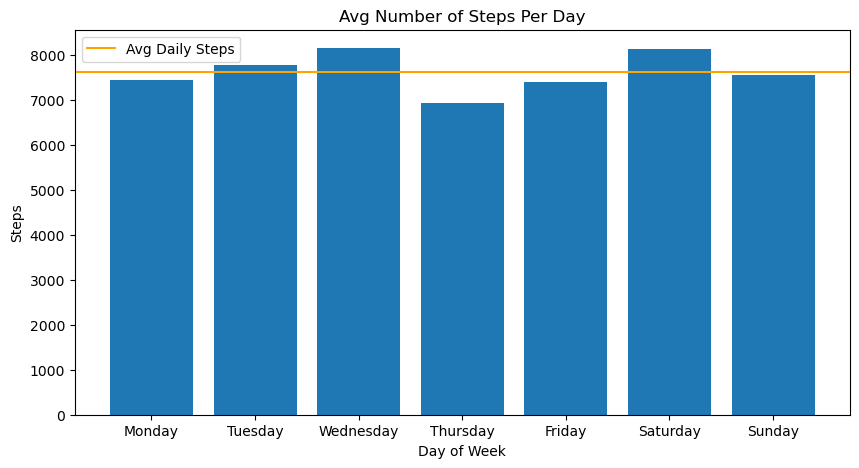

In [137]:
#https://www.kaggle.com/code/victoriamcmath/fitness-tracker-case-study
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, ax=plt.subplots(1,1,figsize=(10,5))
day_grp=dailyActivity.groupby(['Day_of_Week'])
avg_daily_steps = day_grp['TotalSteps'].mean()
avg_steps = dailyActivity['TotalSteps'].mean()

plt.bar(avg_daily_steps.index, avg_daily_steps)

ax.set_xticks(range(len(day_of_week)))
ax.set_xticklabels(day_of_week)

ax.axhline(avg_daily_steps.mean(), color= 'orange', label='Avg Daily Steps')
ax.set_ylabel('Steps')
ax.set_xlabel('Day of Week')
ax.set_title('Avg Number of Steps Per Day')

plt.legend()
plt.show()


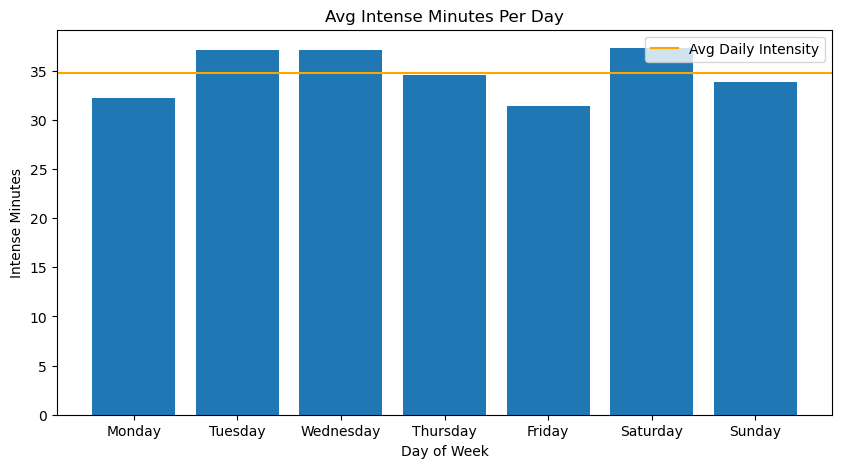

In [138]:
dailyActivity["IntenseMinutes"]=dailyActivity["VeryActiveMinutes"]+dailyActivity["FairlyActiveMinutes"]

ig, ax=plt.subplots(1,1,figsize=(10,5))
day_grp=dailyActivity.groupby(['Day_of_Week'])
avg_daily_intense_mins = day_grp['IntenseMinutes'].mean()
avg_intense_minutes = dailyActivity['IntenseMinutes'].mean()

plt.bar(avg_daily_intense_mins.index, avg_daily_intense_mins)

ax.set_xticks(range(len(day_of_week)))
ax.set_xticklabels(day_of_week)

ax.axhline(avg_daily_intense_mins.mean(), color= 'orange', label='Avg Daily Intensity')
ax.set_ylabel('Intense Minutes')
ax.set_xlabel('Day of Week')
ax.set_title('Avg Intense Minutes Per Day')

plt.legend()
plt.show()

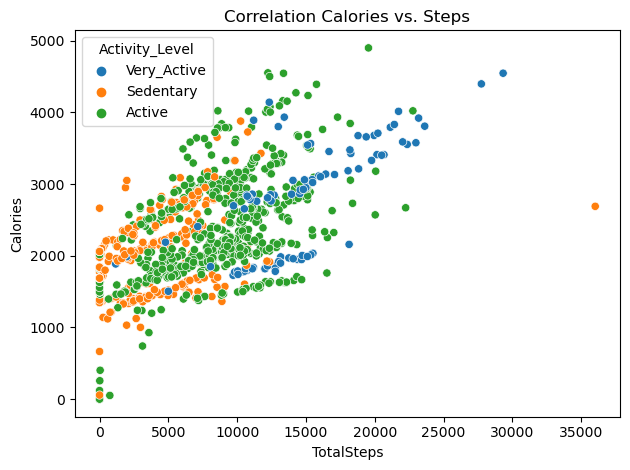

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day_of_Week,N_Day_of_Week,IntenseMinutes,Activity_Level
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1,38,Very_Active
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,2,40,Very_Active
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,3,41,Very_Active
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,4,63,Very_Active
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,5,46,Very_Active


In [139]:
#https://www.kaggle.com/code/victoriamcmath/fitness-tracker-case-study
id_grp = dailyActivity.groupby(['Id'])
id_avg_step = id_grp['TotalSteps'].mean().sort_values(ascending=False)

id_avg_step = id_avg_step.to_frame()
conditions = [(id_avg_step <=6000), (id_avg_step > 6000) & (id_avg_step < 12000), (id_avg_step >=12000)]
values = ['Sedentary', 'Active', 'Very_Active']
id_avg_step['Activity_Level'] = np.select(conditions, values)
id_activity_level = id_avg_step['Activity_Level']
dailyActivity['Activity_Level'] = [id_activity_level[c] for c in dailyActivity['Id']]

ax = sns.scatterplot(x="TotalSteps", y= "Calories", data=dailyActivity, hue=dailyActivity['Activity_Level'])
plt.title('Correlation Calories vs. Steps')

plt.tight_layout()
plt.show()
dailyActivity.head()

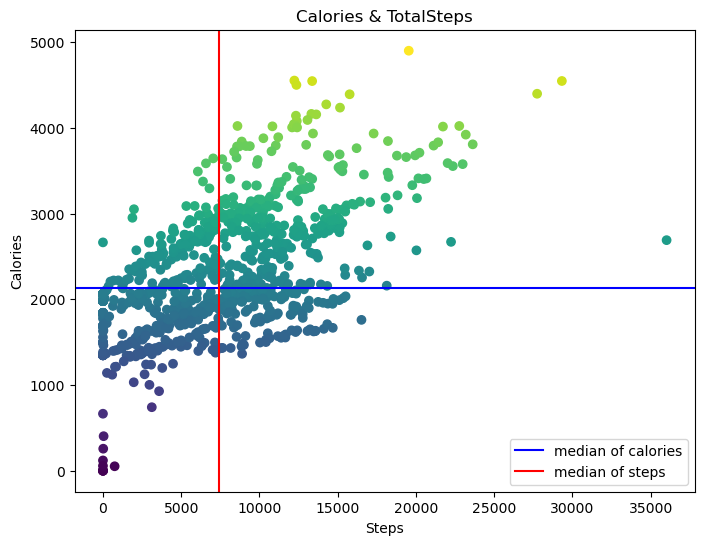

In [140]:
plt.figure(figsize=(8,6))
plt.scatter(dailyActivity['TotalSteps'] ,dailyActivity['Calories'], c=dailyActivity['Calories'])

median_steps = 7405
median_calories = 2134

plt.axhline(median_calories, color = 'b', label = 'median of calories')
plt.axvline(median_steps, color = 'r', label = 'median of steps')

plt.xlabel('Steps')
plt.ylabel('Calories')
plt.title('Calories & TotalSteps')

plt.legend()
plt.show()

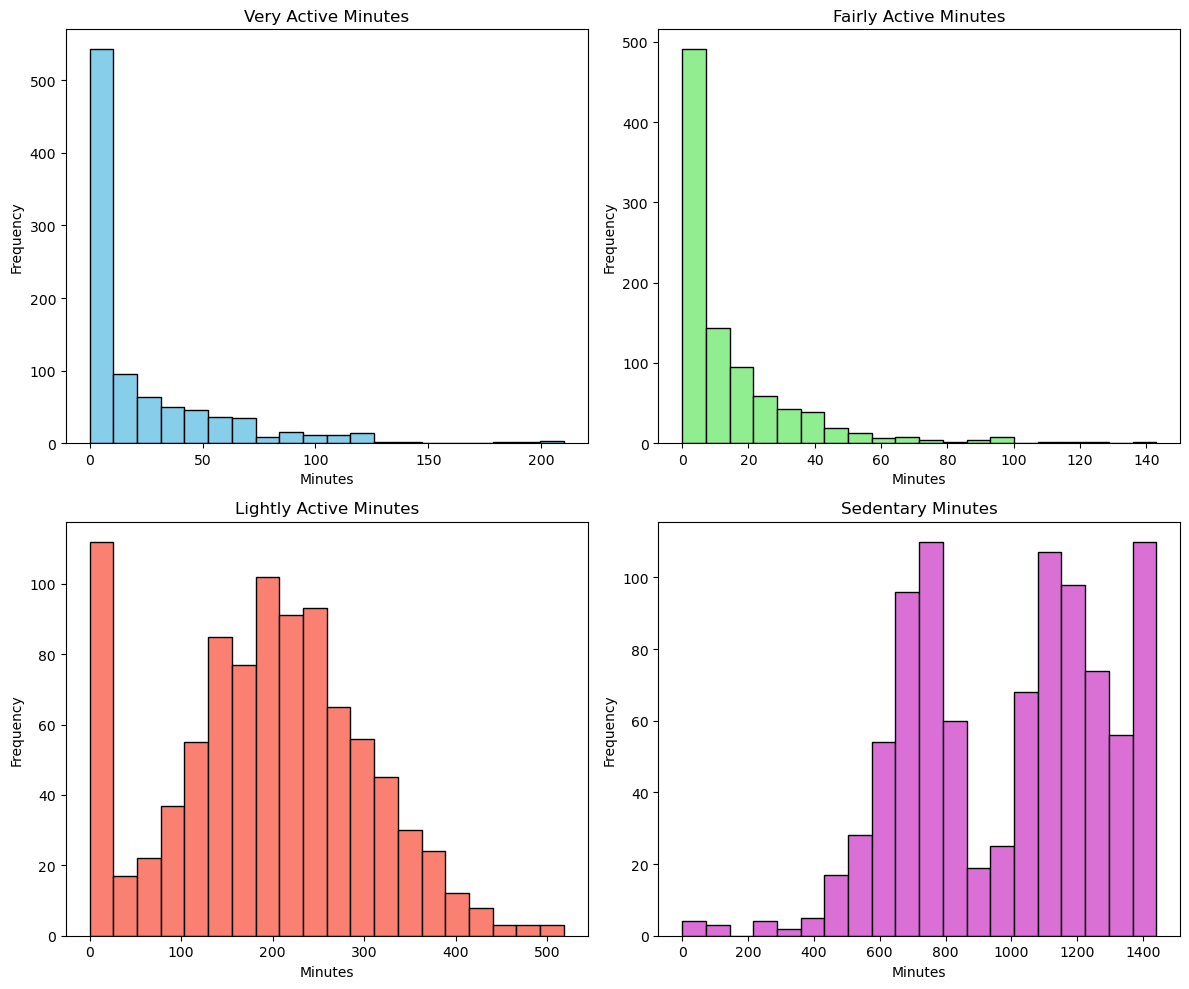

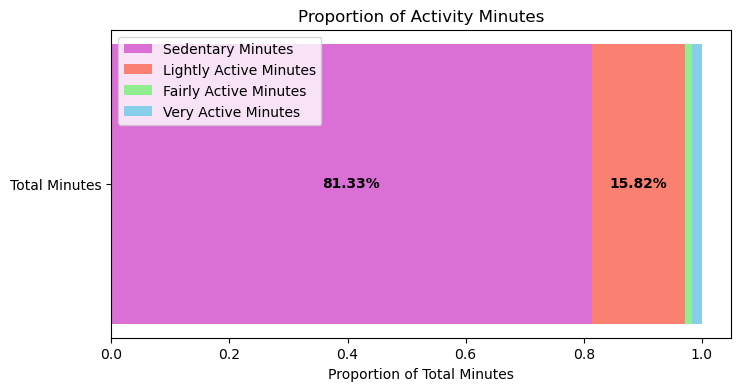

In [141]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

dailyActivity['VeryActiveMinutes'].plot.hist(ax=axes[0, 0], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Very Active Minutes')
axes[0, 0].set_xlabel('Minutes')
axes[0, 0].set_ylabel('Frequency')

dailyActivity['FairlyActiveMinutes'].plot.hist(ax=axes[0, 1], bins=20, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Fairly Active Minutes')
axes[0, 1].set_xlabel('Minutes')
axes[0, 1].set_ylabel('Frequency')

dailyActivity['LightlyActiveMinutes'].plot.hist(ax=axes[1, 0], bins=20, color='salmon', edgecolor='black')
axes[1, 0].set_title('Lightly Active Minutes')
axes[1, 0].set_xlabel('Minutes')
axes[1, 0].set_ylabel('Frequency')

dailyActivity['SedentaryMinutes'].plot.hist(ax=axes[1, 1], bins=20, color='orchid', edgecolor='black')
axes[1, 1].set_title('Sedentary Minutes')
axes[1, 1].set_xlabel('Minutes')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#show common proportion of how much time of intensity people dedicate to each category
def single_stack_graph_minutes(dailyActivities):
    sumSedentary=dailyActivities["SedentaryMinutes"].sum()
    sumLightly=dailyActivities["LightlyActiveMinutes"].sum()
    sumFairly=dailyActivities["FairlyActiveMinutes"].sum()
    sumVery=dailyActivities["VeryActiveMinutes"].sum()
    
    total = sumSedentary + sumLightly + sumFairly + sumVery
    proportions = [sumSedentary / total, sumLightly / total, sumFairly / total, sumVery / total]
    labels = ['Sedentary Minutes', 'Lightly Active Minutes', 'Fairly Active Minutes', 'Very Active Minutes']
    colors = ['orchid', 'salmon', 'lightgreen', 'skyblue']

    fig, ax = plt.subplots(figsize=(8, 4))

    bars = ax.barh(['Total Minutes'], [proportions[0]], color=colors[0], label=labels[0])
    bars1 = ax.barh(['Total Minutes'], [proportions[1]], left=[proportions[0]], color=colors[1], label=labels[1])
    bars2 = ax.barh(['Total Minutes'], [proportions[2]], left=[proportions[0] + proportions[1]], color=colors[2], label=labels[2])
    bars3 = ax.barh(['Total Minutes'], [proportions[3]], left=[proportions[0] + proportions[1] + proportions[2]], color=colors[3], label=labels[3])

    # Adding labels
    for bars in [bars, bars1]:
        for bar in bars:
            width = bar.get_width()
            ax.text(bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2,
                    f'{width:.2%}', ha='center', va='center', color='black', fontsize=10, weight='bold')

    plt.xlabel('Proportion of Total Minutes')
    plt.title('Proportion of Activity Minutes')
    plt.legend()
    plt.show()

# Assuming df is the DataFrame loaded from the CSV file
single_stack_graph_minutes(dailyActivity)

    

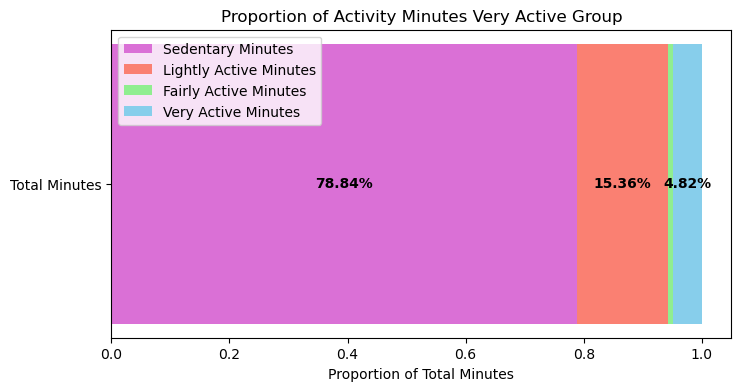

In [142]:
def single_stack_graph_minutes_veryActive(dailyActivities):
    very_active_group = dailyActivities[dailyActivities["Activity_Level"] == "Very_Active"]
    sumSedentary=very_active_group["SedentaryMinutes"].sum()
    sumLightly=very_active_group["LightlyActiveMinutes"].sum()
    sumFairly=very_active_group["FairlyActiveMinutes"].sum()
    sumVery=very_active_group["VeryActiveMinutes"].sum()
    
    total = sumSedentary + sumLightly + sumFairly + sumVery
    proportions = [sumSedentary / total, sumLightly / total, sumFairly / total, sumVery / total]
    labels = ['Sedentary Minutes', 'Lightly Active Minutes', 'Fairly Active Minutes', 'Very Active Minutes']
    colors = ['orchid', 'salmon', 'lightgreen', 'skyblue']

    fig, ax = plt.subplots(figsize=(8, 4))

    bars = ax.barh(['Total Minutes'], [proportions[0]], color=colors[0], label=labels[0])
    bars1 = ax.barh(['Total Minutes'], [proportions[1]], left=[proportions[0]], color=colors[1], label=labels[1])
    bars2 = ax.barh(['Total Minutes'], [proportions[2]], left=[proportions[0] + proportions[1]], color=colors[2], label=labels[2])
    bars3 = ax.barh(['Total Minutes'], [proportions[3]], left=[proportions[0] + proportions[1] + proportions[2]], color=colors[3], label=labels[3])

    # Adding labels
    for bars in [bars, bars1,bars3]:
        for bar in bars:
            width = bar.get_width()
            ax.text(bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2,
                    f'{width:.2%}', ha='center', va='center', color='black', fontsize=10, weight='bold')

    plt.xlabel('Proportion of Total Minutes')
    plt.title('Proportion of Activity Minutes Very Active Group')
    plt.legend()
    plt.show()
    
single_stack_graph_minutes_veryActive(dailyActivity)

In [143]:
#https://saturncloud.io/blog/how-to-select-row-with-max-value-in-column-from-pandas-groupby-groups/#:~:text=Using%20groupby()%20and%20idxmax()&text=groupby()%20groups%20the%20data,Score'%20column%20for%20each%20group.&text=Here%2C%20idx%20is%20a%20Pandas,maximum%20value%20for%20each%20group.
def maximum_steps_per_Id(df: pd.DataFrame):
    idx = df.groupby("Id")["TotalSteps"].idxmax()
    max_scores = df.loc[idx, ["Id", "TotalSteps"]]
    return max_scores.head()

def average_steps_per_Id(df: pd.DataFrame):
    group = df.groupby("Id")
    avg_scores = group["TotalSteps"].mean()
    return avg_scores.head()



In [144]:
maximum_steps_per_Id(dailyActivity)

,Id,TotalSteps
15,1503960366,18134
50,1624580081,36019
80,1644430081,18213
101,1844505072,8054
143,1927972279,3790


In [145]:
average_steps_per_Id(dailyActivity)

Id
1503960366    12116.741935
1624580081     5743.903226
1644430081     7282.966667
1844505072     2580.064516
1927972279      916.129032
Name: TotalSteps, dtype: float64

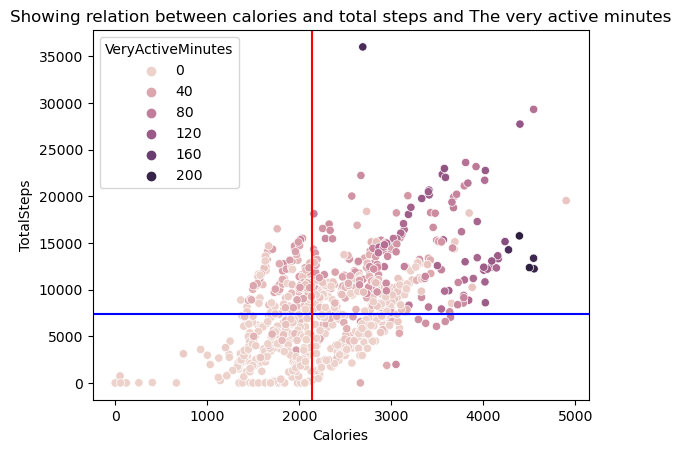

In [146]:
sns.scatterplot(x = "Calories",
                y= "TotalSteps",
                hue="VeryActiveMinutes",
                data = dailyActivity)
median_steps = 7405
median_calories = 2134

plt.axhline(median_steps, color = 'b', label = 'median of steps')
plt.axvline(median_calories, color = 'r', label = 'median of calories')

plt.title("Showing relation between calories and total steps and The very active minutes")
plt.show()

# 2)Sleep Analysis

## i) Analysis sleep day 

In [206]:
print(sleepday.shape)

(413, 6)


In [207]:
sleepday.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
Date                  0
dtype: int64

In [208]:
sleepday.isna().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
Date                  0
dtype: int64

In [209]:
sleepday.duplicated().sum()

3

In [210]:
sleepday1 = sleepday.drop_duplicates()
sleepday1.duplicated().sum()

0

In [211]:
sleepday1.shape

(410, 6)

In [212]:
sleepday1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410 entries, 0 to 412
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  410 non-null    int64         
 1   SleepDay            410 non-null    datetime64[ns]
 2   TotalSleepRecords   410 non-null    int64         
 3   TotalMinutesAsleep  410 non-null    int64         
 4   TotalTimeInBed      410 non-null    int64         
 5   Date                410 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 22.4+ KB


In [213]:
sleepday1.isna().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
Date                  0
dtype: int64

In [214]:
sleepday1.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
Date                  0
dtype: int64

In [215]:
sleepday1.columns

Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'Date'],
      dtype='object')

In [217]:


sleepday1["SleepDay"] = pd.to_datetime(sleepday1["SleepDay"], errors='coerce')

sleepday1 = sleepday1.dropna(subset=["SleepDay"])

sleepday1["Day_of_Week"] = sleepday1["SleepDay"].dt.day_name()

sleepday1["N_Day_of_Week"] = sleepday1["SleepDay"].dt.weekday


In [218]:
countAnomaly = 0
for _,entry in sleepday1.iterrows():
    asleep=entry["TotalMinutesAsleep"]
    inBed=entry["TotalTimeInBed"]
    if asleep>inBed:
        countAnomaly+=1
    
print(countAnomaly)


0


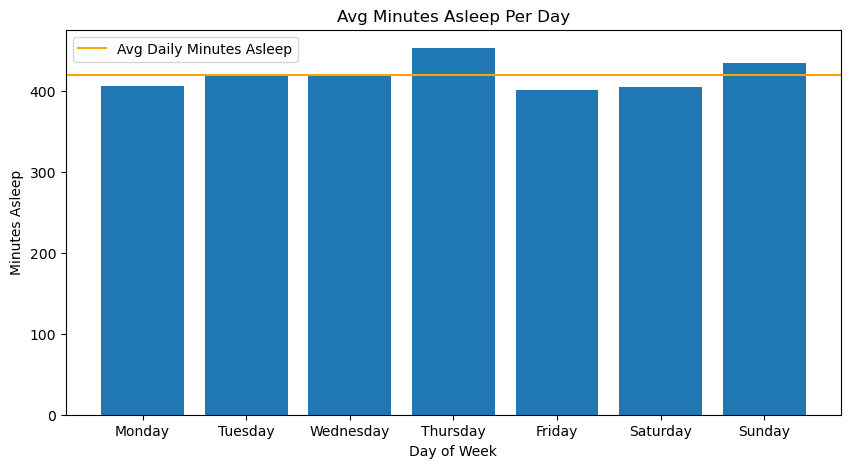

In [219]:
ig, ax=plt.subplots(1,1,figsize=(10,5))
day_grp=sleepday1.groupby(['Day_of_Week'])
avg_daily_asleep_mins = day_grp['TotalMinutesAsleep'].mean()
avg_asleep_minutes = sleepday1['TotalMinutesAsleep'].mean()

plt.bar(avg_daily_asleep_mins.index, avg_daily_asleep_mins)

ax.set_xticks(range(len(day_of_week)))
ax.set_xticklabels(day_of_week)

ax.axhline(avg_daily_asleep_mins.mean(), color= 'orange', label='Avg Daily Minutes Asleep')
ax.set_ylabel('Minutes Asleep')
ax.set_xlabel('Day of Week')
ax.set_title('Avg Minutes Asleep Per Day')

plt.legend(loc="upper left")
plt.show()

In [221]:
print(avg_asleep_minutes)

419.17317073170733


Thursday is the day with the with the highest average sleep on average whereas Friday is the day with the lowest sleep on average

https://www.sleepfoundation.org/how-sleep-works/how-much-sleep-do-we-really-need
https://www.calm.com/blog/oversleeping-tips#:~:text=Oversleeping%20varies%20by%20age%20and,check%20in%20with%20your%20doc.
 
From this two resources, we came up with the following quantity of sleep categories:

1)Deprieved: <7 hours (<420 minutes)

2)Normal: 7-9 hours(420-540 minutes)

3)Excessive: 9< hours(540 minutes)

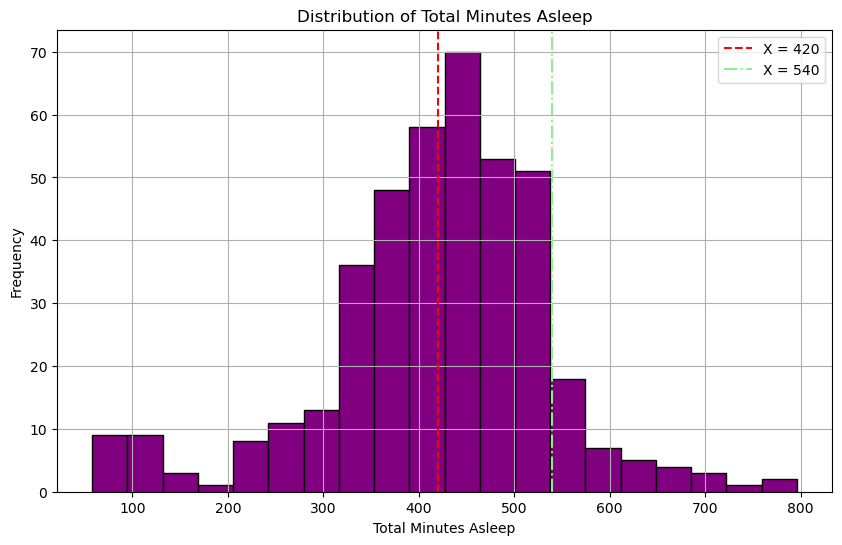

In [166]:
plt.figure(figsize=(10, 6))
plt.hist(sleepday1['TotalMinutesAsleep'], bins=20, color='purple', edgecolor='black')

plt.axvline(x=420, color='red', linestyle='--', label='X = 420')
plt.axvline(x=540, color='lightgreen', linestyle='-.', label='X = 540')

plt.title('Distribution of Total Minutes Asleep')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

Total Minutes asleep follows similar form to Normal distribution

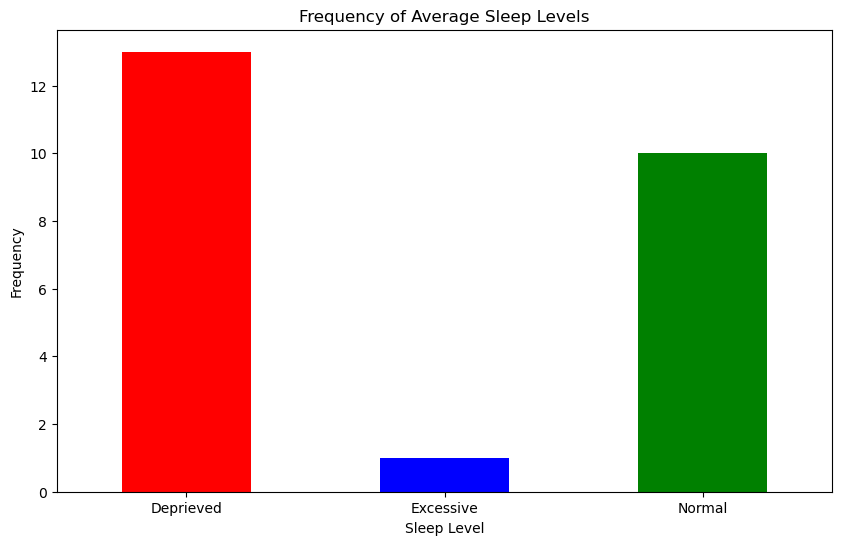

In [225]:
#group by Id and compute average


id_grp_sleep = sleepday1.groupby(['Id'])
id_avg_sleep = id_grp_sleep['TotalMinutesAsleep'].mean().sort_values(ascending=False)

id_avg_sleep = id_avg_sleep.to_frame()
intervals = [(id_avg_sleep <= 420), (id_avg_sleep > 420) & (id_avg_sleep < 540), (id_avg_sleep >= 540)]
values_sleep = ['Deprieved', 'Normal', 'Excessive']
id_avg_sleep['Sleep_Level'] = np.select(intervals, values_sleep)
id_sleep_level = id_avg_sleep['Sleep_Level']
sleepday1.loc[:, 'Sleep_Level'] = sleepday1['Id'].map(id_sleep_level)

sleep_level_frequency = id_avg_sleep["Sleep_Level"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sleep_level_frequency.plot(kind='bar', color=['red', 'blue', 'green'])

plt.title('Frequency of Average Sleep Levels')
plt.xlabel('Sleep Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

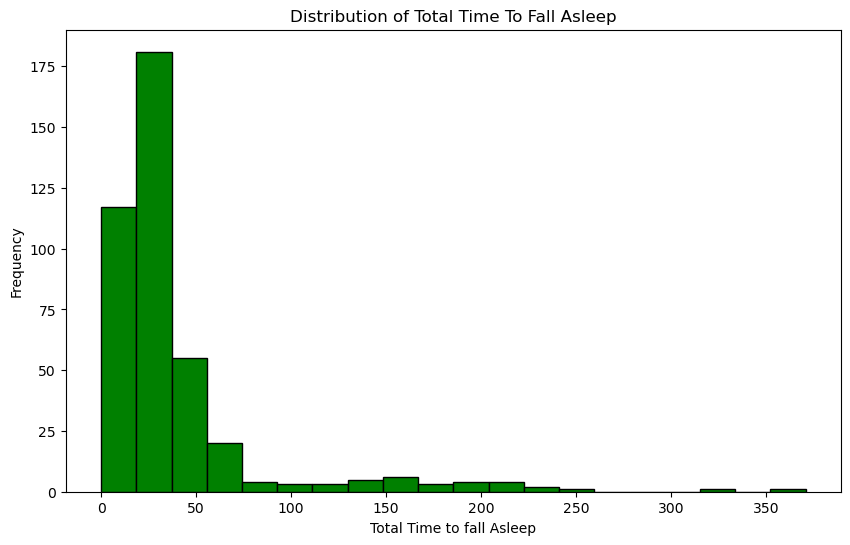

In [226]:
sleepday1.loc[:, "TimeToFallAsleep"] = sleepday1["TotalTimeInBed"] - sleepday1["TotalMinutesAsleep"]

plt.figure(figsize=(10, 6))
plt.hist(sleepday1['TimeToFallAsleep'], bins=20, color='green', edgecolor='black')


plt.title('Distribution of Total Time To Fall Asleep')
plt.xlabel('Total Time to fall Asleep')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

Total Minutes Asleep(= Total Time in bed - Total Minutes Asleep) distribution follows a similar form to the chi squared and exponential distribution. 

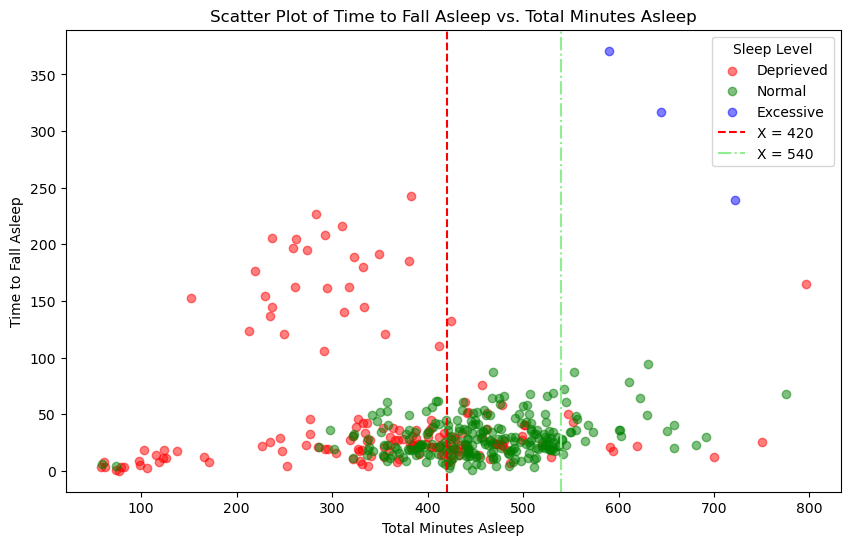

In [227]:
#time to fall asleep vs time slept
colors = {'Deprieved': 'red', 'Normal': 'green', 'Excessive': 'blue'}
plt.figure(figsize=(10, 6))

for sleep_level in values_sleep:
    subset = sleepday1[sleepday1['Sleep_Level'] == sleep_level]
    plt.scatter(subset['TotalMinutesAsleep'], subset['TimeToFallAsleep'],
                c=colors[sleep_level], label=sleep_level, alpha=0.5)

plt.axvline(x=420, color='red', linestyle='--', label='X = 420')
plt.axvline(x=540, color='lightgreen', linestyle='-.', label='X = 540')

plt.title('Scatter Plot of Time to Fall Asleep vs. Total Minutes Asleep')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Time to Fall Asleep')
plt.legend(title='Sleep Level')
plt.show()

In [228]:
groups_level = sleepday1.groupby("Sleep_Level")["TimeToFallAsleep"]
print(groups_level.var())
print(groups_level.size())


Sleep_Level
Deprieved    3451.204355
Excessive    4404.000000
Normal        292.153831
Name: TimeToFallAsleep, dtype: float64
Sleep_Level
Deprieved    162
Excessive      3
Normal       245
Name: TimeToFallAsleep, dtype: int64


## ii) Analysis sleep day merged with daily activity

In [229]:
def merge_dailyActivity_sleepday(dailyActivity: pd.DataFrame, sleepday: pd.DataFrame): 
   
    df = pd.merge(sleepday,dailyActivity,left_on = ["Id","SleepDay"],right_on = ["Id","ActivityDate"])
    df["TimeToFallAsleep"] = df["TotalTimeInBed"]-df["TotalMinutesAsleep"]
    
    return df

In [230]:
activityAndSleepday = merge_dailyActivity_sleepday(dailyActivity,sleepday1)
activityAndSleepday.isnull().sum()

Id                          0
SleepDay                    0
TotalSleepRecords           0
TotalMinutesAsleep          0
TotalTimeInBed              0
Date                        0
Day_of_Week_x               0
N_Day_of_Week_x             0
Sleep_Level                 0
TimeToFallAsleep            0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
Day_of_Week_y               0
N_Day_of_Week_y             0
IntenseMinutes              0
Activity_Level              0
dtype: int64

In [231]:
activityAndSleepday.isna().sum()

Id                          0
SleepDay                    0
TotalSleepRecords           0
TotalMinutesAsleep          0
TotalTimeInBed              0
Date                        0
Day_of_Week_x               0
N_Day_of_Week_x             0
Sleep_Level                 0
TimeToFallAsleep            0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
Day_of_Week_y               0
N_Day_of_Week_y             0
IntenseMinutes              0
Activity_Level              0
dtype: int64

In [232]:
#activityAndSleepday.duplicates()acti
activityAndSleepday.duplicated().sum()

0

In [233]:
activityAndSleepday1 = activityAndSleepday.drop_duplicates()
activityAndSleepday1.duplicated().sum()

0

In [234]:
activityAndSleepday1.shape

(410, 28)

In [235]:
activityAndSleepday1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        410 non-null    int64         
 1   SleepDay                  410 non-null    datetime64[ns]
 2   TotalSleepRecords         410 non-null    int64         
 3   TotalMinutesAsleep        410 non-null    int64         
 4   TotalTimeInBed            410 non-null    int64         
 5   Date                      410 non-null    object        
 6   Day_of_Week_x             410 non-null    object        
 7   N_Day_of_Week_x           410 non-null    int32         
 8   Sleep_Level               410 non-null    object        
 9   TimeToFallAsleep          410 non-null    int64         
 10  ActivityDate              410 non-null    datetime64[ns]
 11  TotalSteps                410 non-null    int64         
 12  TotalDistance         

In [237]:
#count if for each entry N_day_week_x(one datset) does not match N_day_week_y(the other dataset)
countAnomalyDay = 0
for _,entry in activityAndSleepday1.iterrows():
    dayX=entry["N_Day_of_Week_x"]
    dayY=entry["N_Day_of_Week_y"]
    if dayX != dayY:
        countAnomalyDay+=1
    
print(countAnomaly)


0


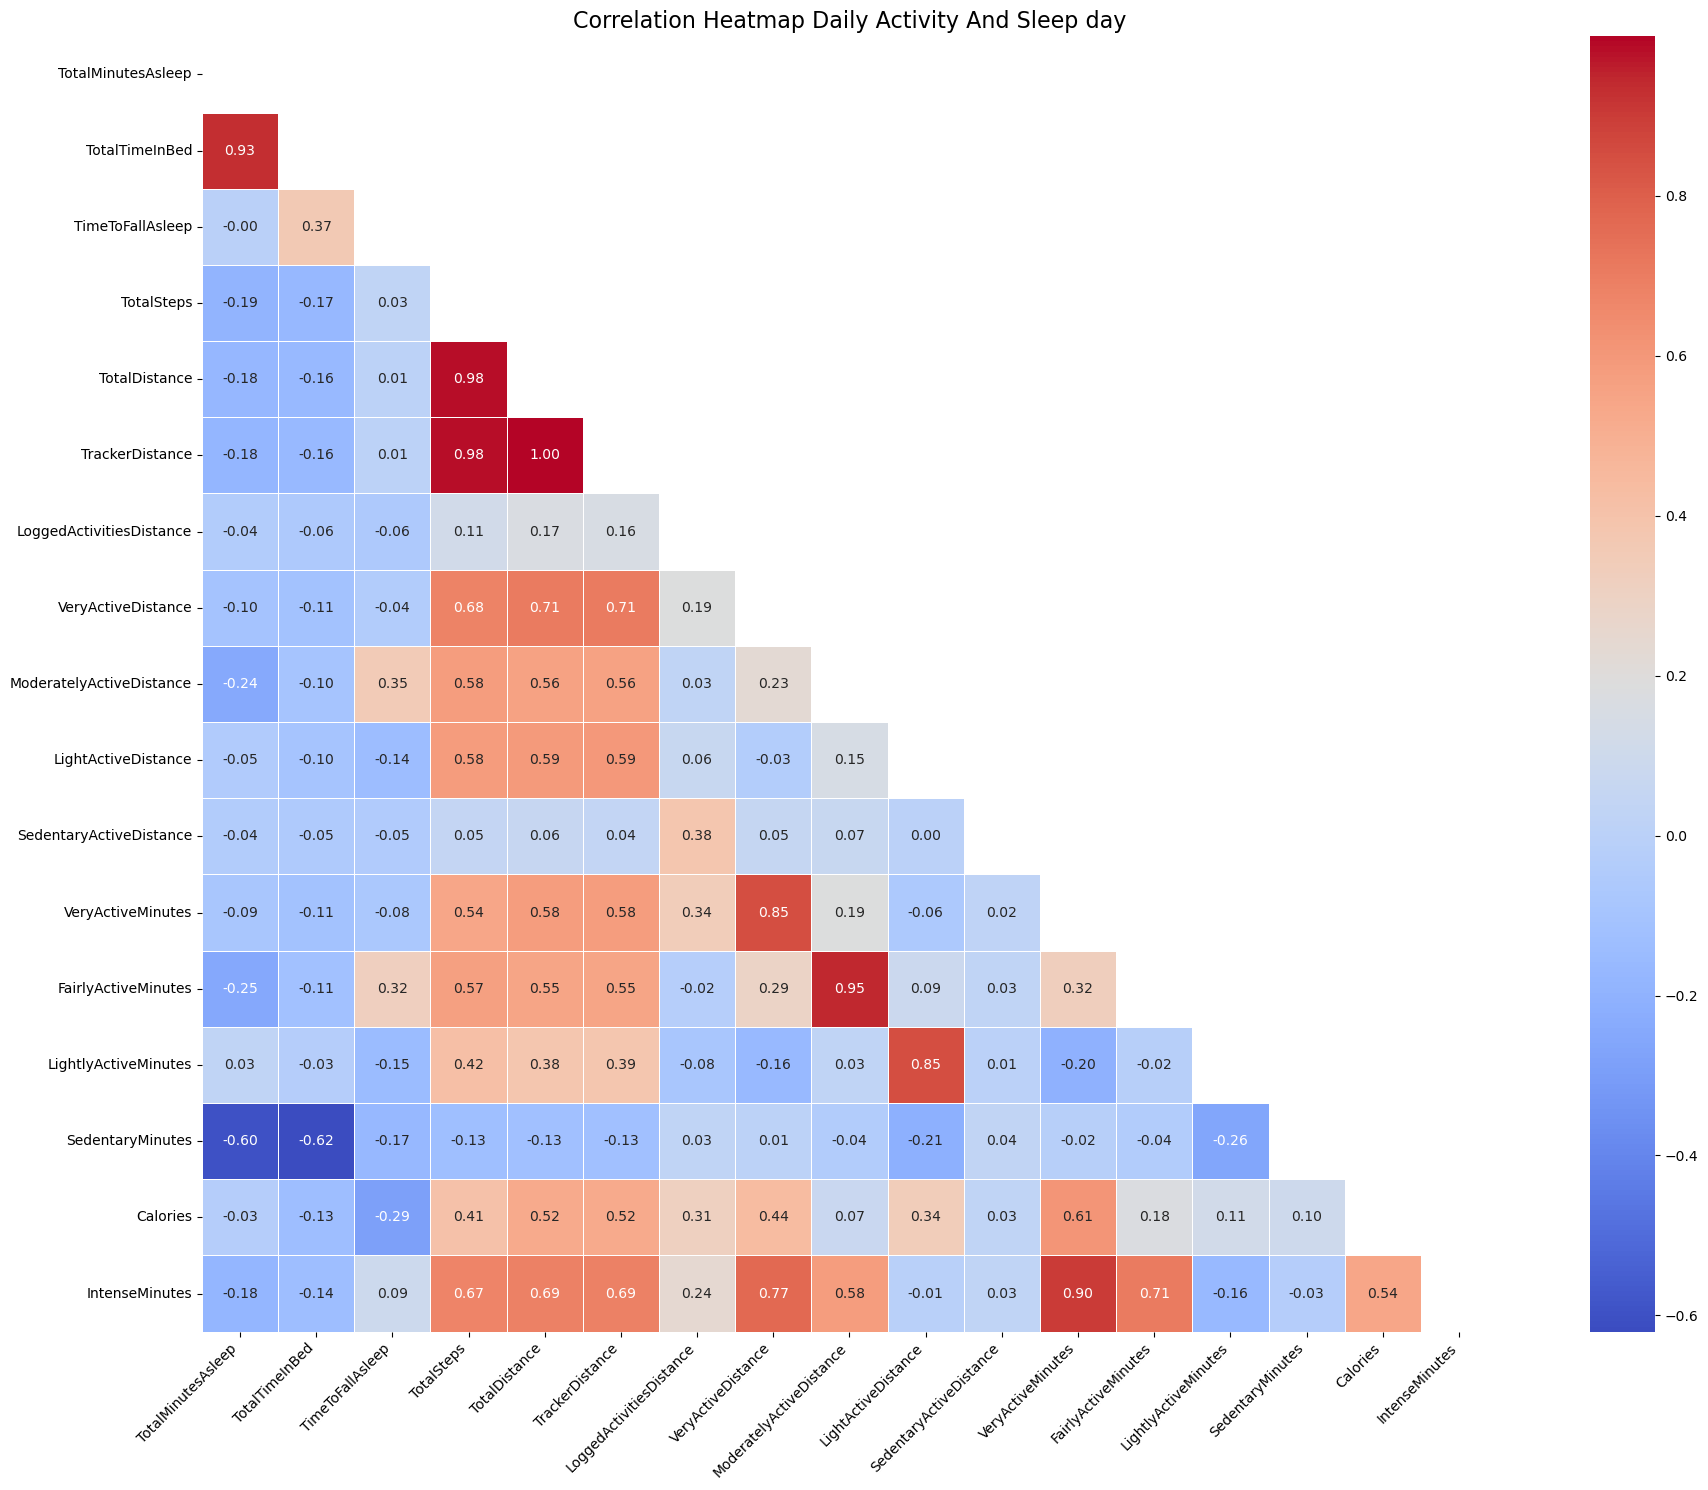

In [238]:
#activityAndSleepday1.corr()--- do correlations
dfCorrelation = activityAndSleepday1.iloc[:, 1:] 
dfCorrelation = dfCorrelation.drop("N_Day_of_Week_x", axis=1)
dfCorrelation = dfCorrelation.drop("N_Day_of_Week_y", axis=1)
dfCorrelation = dfCorrelation.drop("TotalSleepRecords", axis=1)
numeric_columns = dfCorrelation.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, linecolor='white',
            fmt=".2f", square=True, cbar=True, mask = mask)
plt.title("Correlation Heatmap Daily Activity And Sleep day", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [239]:
#describe TotalMinutesAsleep by category Activity level
describeVeryActive = activityAndSleepday1[activityAndSleepday1["Activity_Level"]=="Very_Active"]
describeActive = activityAndSleepday1[activityAndSleepday1["Activity_Level"]=="Active"]
describeSedentary = activityAndSleepday1[activityAndSleepday1["Activity_Level"]=="Sedentary"]

print("Very Active(TotalMinutesAsleep): \n ",describeVeryActive["TotalMinutesAsleep"].describe())
print("Active(TotalMinutesAsleep): \n ",describeActive["TotalMinutesAsleep"].describe())
print("Sedentary(TotalMinutesAsleep): \n ",describeSedentary["TotalMinutesAsleep"].describe())



Very Active(TotalMinutesAsleep): 
  count     28.00000
mean     353.50000
std      112.15515
min       74.00000
25%      299.25000
50%      339.00000
75%      383.25000
max      700.00000
Name: TotalMinutesAsleep, dtype: float64
Active(TotalMinutesAsleep): 
  count    291.000000
mean     421.044674
std      117.245608
min       58.000000
25%      375.500000
50%      435.000000
75%      485.000000
max      796.000000
Name: TotalMinutesAsleep, dtype: float64
Sedentary(TotalMinutesAsleep): 
  count     91.000000
mean     433.395604
std      119.728942
min       61.000000
25%      379.500000
50%      442.000000
75%      511.000000
max      750.000000
Name: TotalMinutesAsleep, dtype: float64


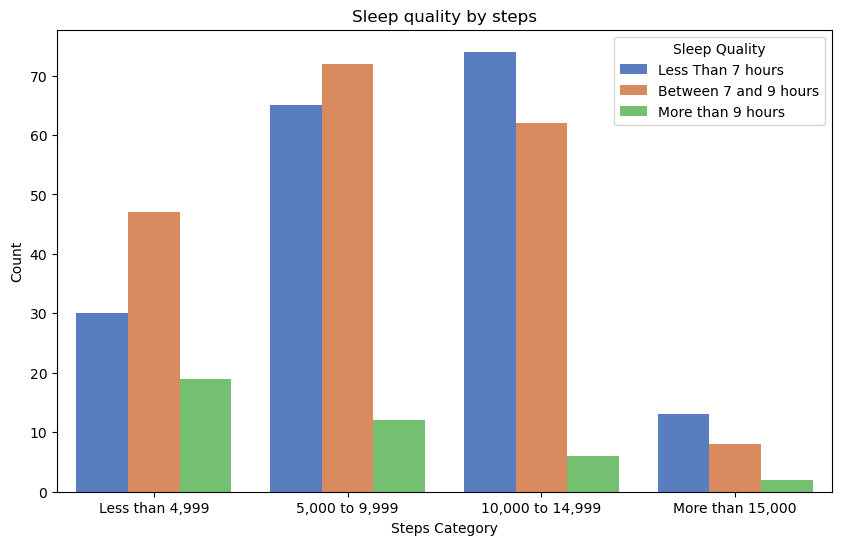

In [243]:

# Create DataFrame
activityAndSleep_copy = activityAndSleepday1.copy()

# Define the bins and labels
binsSteps = [0, 4999, 9999, 14999, float('inf')]
binsSleep = [0, 420, 540, float('inf')]
labelsSteps = ["Less than 4,999", "5,000 to 9,999", "10,000 to 14,999", "More than 15,000"]
labelsSleep = ["Less Than 7 hours", "Between 7 and 9 hours", "More than 9 hours"]

# Create a new column 'Steps Category' by binning the 'Steps' column
activityAndSleep_copy["Steps Category"] = pd.cut(activityAndSleep_copy["TotalSteps"], bins=binsSteps, labels=labelsSteps)
activityAndSleep_copy["Sleep Category"] = pd.cut(activityAndSleep_copy["TotalMinutesAsleep"], bins=binsSleep, labels=labelsSleep)

# Group by 'Steps Category' and 'Sleep Quality' and count the occurrences
grouped = activityAndSleep_copy.groupby(['Steps Category', 'Sleep Category']).size().reset_index(name="Frequency")

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Steps Category", y="Frequency", hue="Sleep Category", data=grouped, palette="muted")

# Customize the plot
plt.title("Sleep quality by steps")
plt.xlabel("Steps Category")
plt.ylabel("Count")
plt.legend(title="Sleep Quality")
plt.show()

In [241]:
#statistical significance for time to fall asleep and activity level
#null: Total Minutes Asleep is equal among the different Activity_Level groups
group1MinutesAsleep = describeVeryActive["TotalMinutesAsleep"]
group2MinutesAsleep = describeActive["TotalMinutesAsleep"]
group3MinutesAsleep = describeSedentary["TotalMinutesAsleep"]

stat, p = kruskal(group1MinutesAsleep, group2MinutesAsleep, group3MinutesAsleep)

print("Kruskal-Wallis H test statistic(TotalMinutesAsleep):", stat)
print("p-value(TotalMinutesAsleep):", p)

Kruskal-Wallis H test statistic(TotalMinutesAsleep): 19.660732383868925
p-value(TotalMinutesAsleep): 5.379305480710529e-05


In [195]:
#https://www.youtube.com/watch?v=hTsxJqw2zMM
validSleep_Levels = ["Deprieved","Normal"]#drop Excessive as only 3 total observations
dropExcessiveSleep = activityAndSleepday1[activityAndSleepday1["Sleep_Level"].isin(validSleep_Levels)]
myfield1 = dropExcessiveSleep["Activity_Level"]
myfield2 = dropExcessiveSleep["Sleep_Level"]

myCrosstable = pd.crosstab(myfield1,myfield2)
print(myCrosstable)
chiVal, pVal, df, exp = chi2_contingency(myCrosstable)
print("\n Expected Values:",exp)
print("\n P value", pVal)

Sleep_Level     Deprieved  Normal
Activity_Level                   
Active                 89     202
Sedentary              45      43
Very_Active            28       0

 Expected Values: [[115.82800983 175.17199017]
 [ 35.02702703  52.97297297]
 [ 11.14496314  16.85503686]]

 P value 3.4586921804517146e-13


In [240]:
#describe TimeToFallAsleep by category Activity level
print("Very Active(TimeToFallAsleep): \n ",describeVeryActive["TimeToFallAsleep"].describe())
print("Active(TimeToFallAsleep): \n ",describeActive["TimeToFallAsleep"].describe())
print("Sedentary(TimeToFallAsleep): \n ",describeSedentary["TimeToFallAsleep"].describe())


Very Active(TimeToFallAsleep): 
  count    28.000000
mean     20.964286
std      10.228798
min       1.000000
25%      16.750000
50%      20.500000
75%      27.000000
max      46.000000
Name: TimeToFallAsleep, dtype: float64
Active(TimeToFallAsleep): 
  count    291.000000
mean      41.756014
std       46.389642
min        1.000000
25%       16.500000
50%       26.000000
75%       44.500000
max      243.000000
Name: TimeToFallAsleep, dtype: float64
Sedentary(TimeToFallAsleep): 
  count     91.000000
mean      37.131868
std       53.114177
min        0.000000
25%       19.500000
50%       26.000000
75%       36.500000
max      371.000000
Name: TimeToFallAsleep, dtype: float64


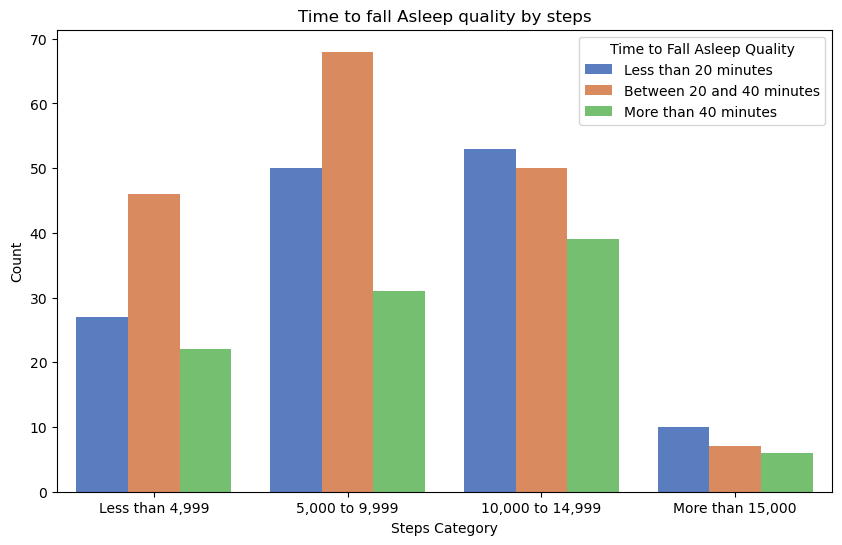

In [244]:

binsFallingAsleep = [0, 20, 40, float('inf')]
labelsFallingAsleep = ["Less than 20 minutes", "Between 20 and 40 minutes", "More than 40 minutes"]

activityAndSleep_copy["Falling Asleep Category"] = pd.cut(activityAndSleep_copy["TimeToFallAsleep"], bins=binsFallingAsleep, labels=labelsFallingAsleep)

grouped2 = activityAndSleep_copy.groupby(['Steps Category', 'Falling Asleep Category']).size().reset_index(name="Frequency")

plt.figure(figsize=(10, 6))
sns.barplot(x="Steps Category", y="Frequency", hue="Falling Asleep Category", data=grouped2, palette="muted")

plt.title("Time to fall Asleep quality by steps")
plt.xlabel("Steps Category")
plt.ylabel("Count")
plt.legend(title="Time to Fall Asleep Quality")
plt.show()

In [248]:
#null: Time to fall Asleep Asleep is equal among the different Activity_Level groups
group1MinutesFallAsleep = describeVeryActive["TimeToFallAsleep"]
group2MinutesFallAsleep = describeActive["TimeToFallAsleep"]
group3MinutesFallAsleep = describeSedentary["TimeToFallAsleep"]

stat, p = kruskal(group1MinutesFallAsleep, group2MinutesFallAsleep, group3MinutesFallAsleep)

print("Kruskal-Wallis H test statistic(TimeToFallAsleep):", stat)
print("p-value(TimeToFallAsleep):", p)

Kruskal-Wallis H test statistic(TimeToFallAsleep): 6.685317619771698
p-value(TimeToFallAsleep): 0.03534286273385773


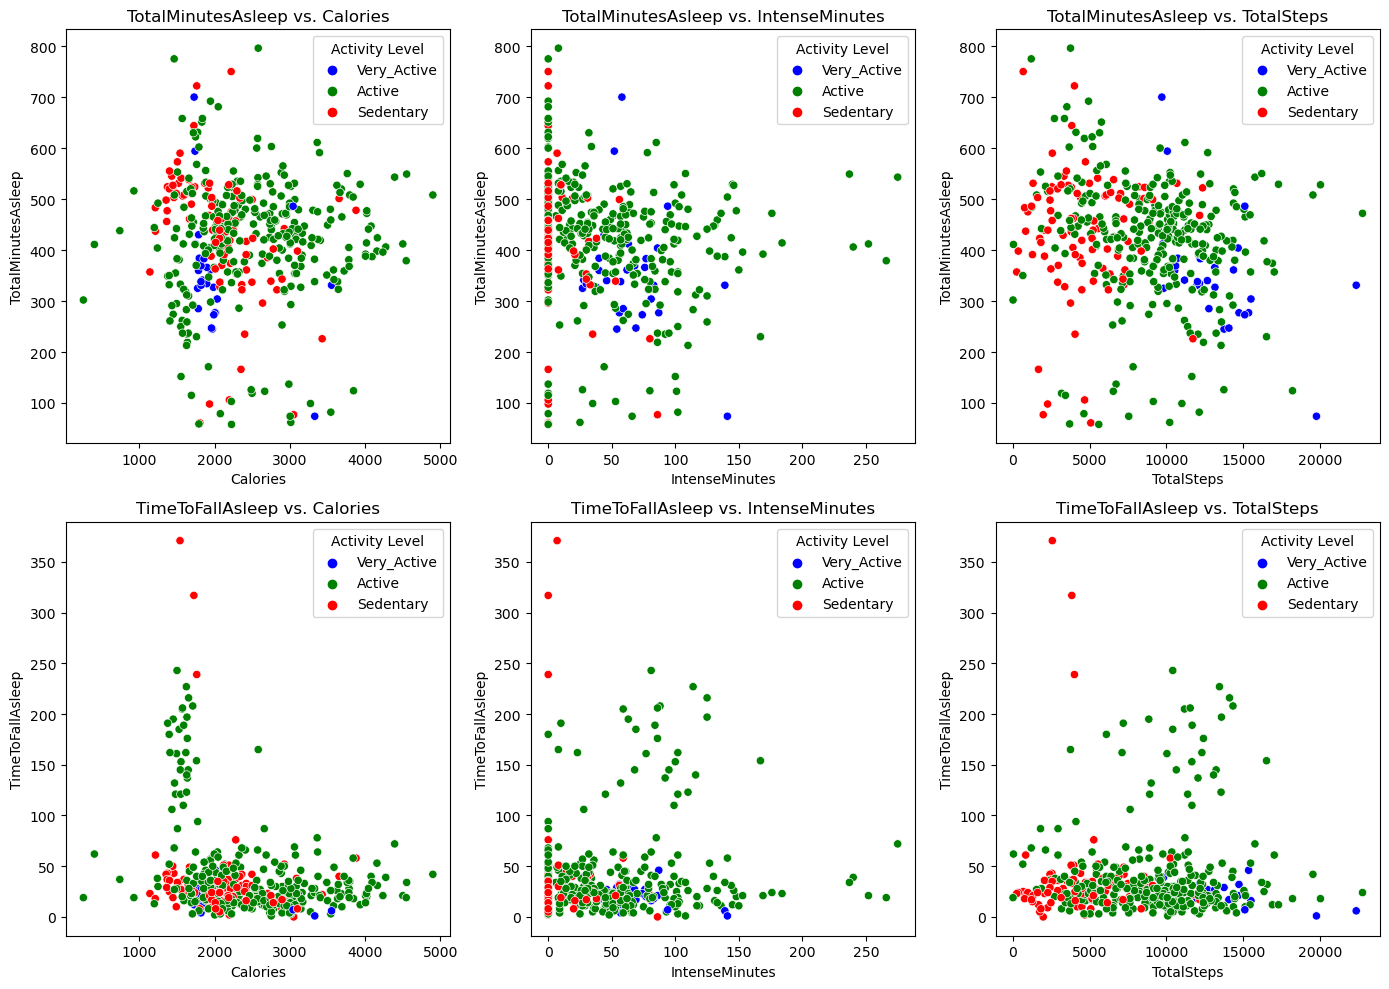

In [245]:
def plot_sleep_vs_variables(df: pd.DataFrame):
    
    variables = ["Calories", "IntenseMinutes", "TotalSteps"]
    sleep_factors = ["TotalMinutesAsleep", "TimeToFallAsleep"]
    
    # Define colors for each Activity_level
    colors = {'Sedentary': 'red', 'Active': 'green', 'Very_Active': 'blue'}    
    # Create a figure with subplots
    plt.figure(figsize=(14, 10))
    
    # Iterate over each sleep factor
    for j, sleep_factor in enumerate(sleep_factors, 1):
        # Iterate over each activity variable
        for i, activity in enumerate(variables, 1):
            
            plt.subplot(2, 3, (j-1)*3 + i)  # Calculate the subplot index
            # Scatter plot with Activity_level coloring
            sns.scatterplot(data=df, x=activity, y=sleep_factor, hue='Activity_Level', palette=colors)
            plt.title(f'{sleep_factor} vs. {activity}')
            plt.xlabel(activity)
            plt.ylabel(sleep_factor)
            plt.legend(title='Activity Level', loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
   
    
plot_sleep_vs_variables(activityAndSleepday1)

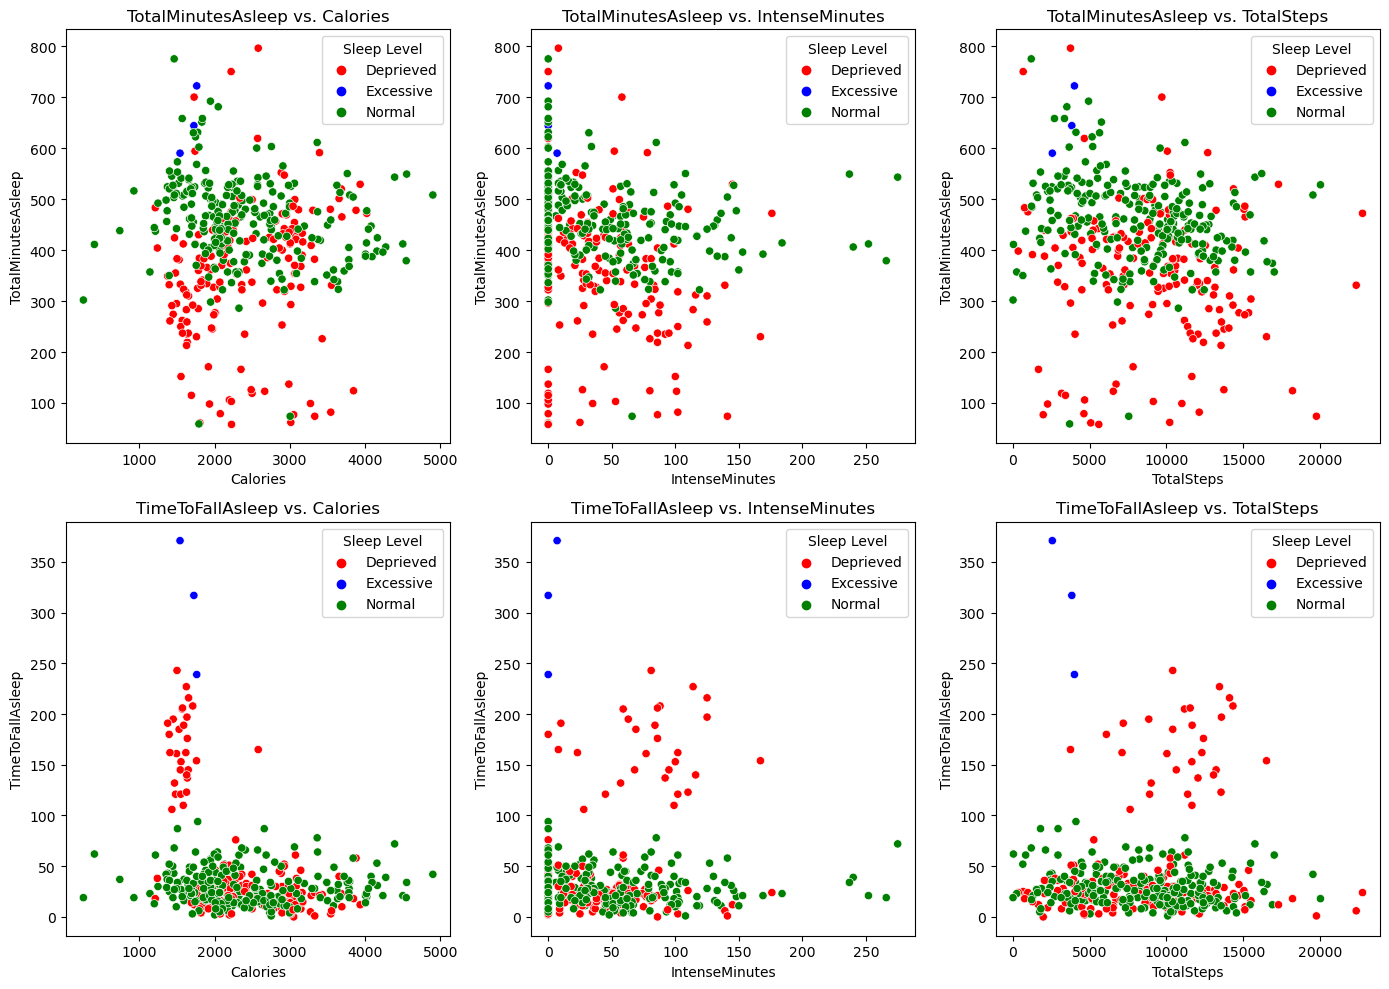

In [246]:
def plot_sleepLevel_and_sleep(df: pd.DataFrame):
    #df= df[df["CorrectTotalTime"]==True]
    variables = ["Calories", "IntenseMinutes", "TotalSteps"]
    sleep_factors = ["TotalMinutesAsleep", "TimeToFallAsleep"]
    
    colors = {"Deprieved": 'red', "Normal": 'green', "Excessive": 'blue'}    
    # Create a figure with subplots
    plt.figure(figsize=(14, 10))
    #2026352035,3977333714,4445114986
    # Iterate over each sleep factor
    for j, sleep_factor in enumerate(sleep_factors, 1):
        # Iterate over each activity variable
        for i, activity in enumerate(variables, 1):
            
            plt.subplot(2, 3, (j-1)*3 + i)  # Calculate the subplot index
            # Scatter plot with Activity_level coloring
            sns.scatterplot(data=df, x=activity, y=sleep_factor, hue='Sleep_Level', palette=colors)
            plt.title(f'{sleep_factor} vs. {activity}')
            plt.xlabel(activity)
            plt.ylabel(sleep_factor)
            plt.legend(title='Sleep Level', loc='upper right')
    
    plt.tight_layout()
    plt.show()


plot_sleepLevel_and_sleep(activityAndSleepday1)

We can see that categorized scatter plot show very noisy data compared to the categorized bar chart, and hypothesis testing.

### Daily ActivityMinutes  vs time slept and time to fall asleep

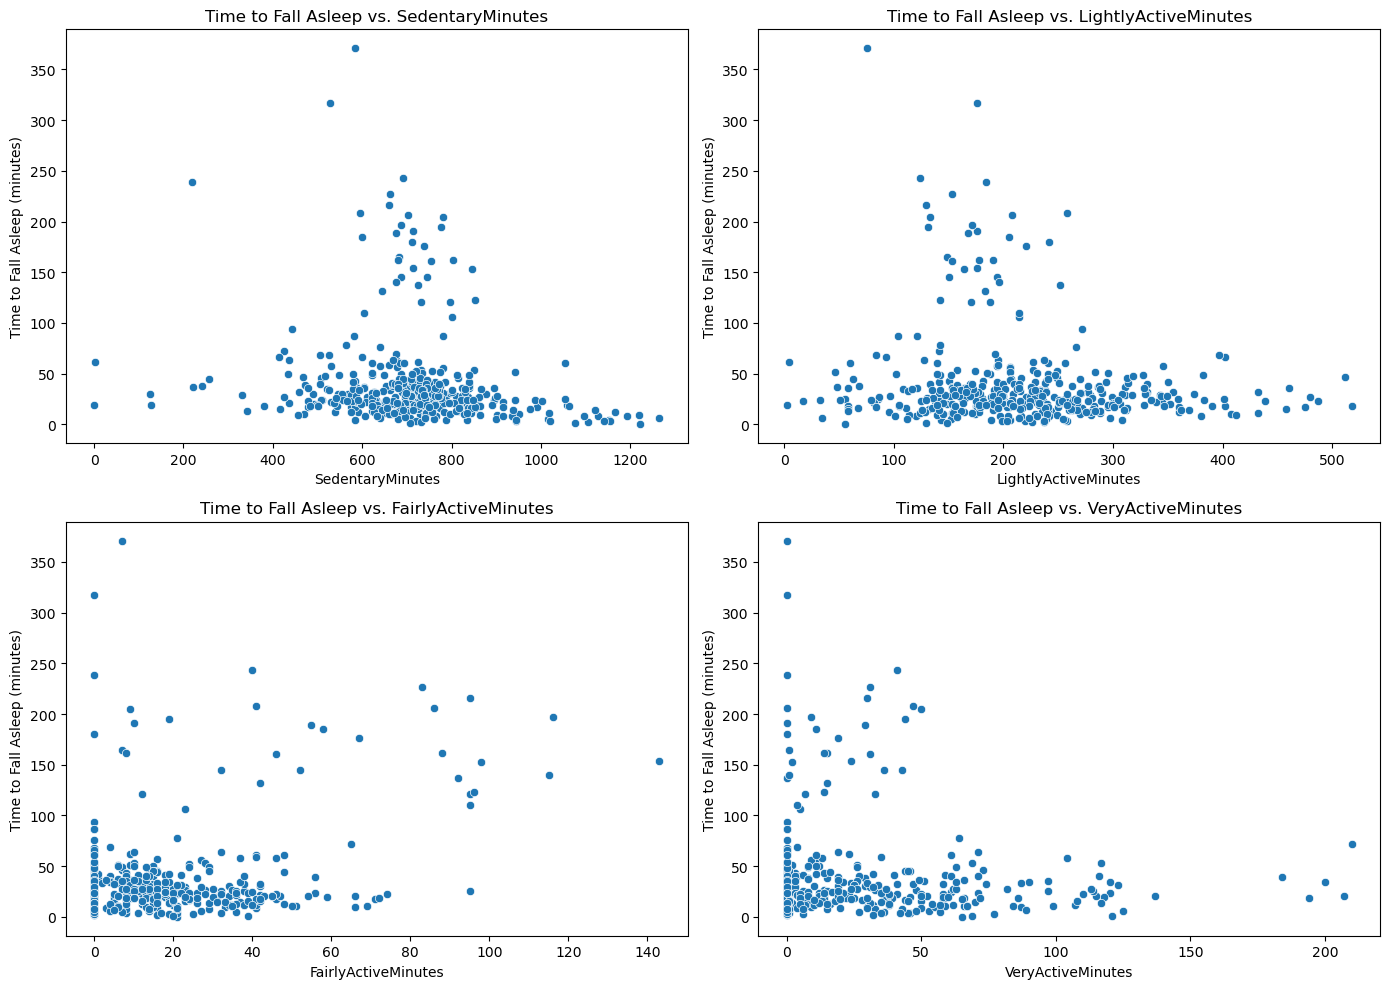

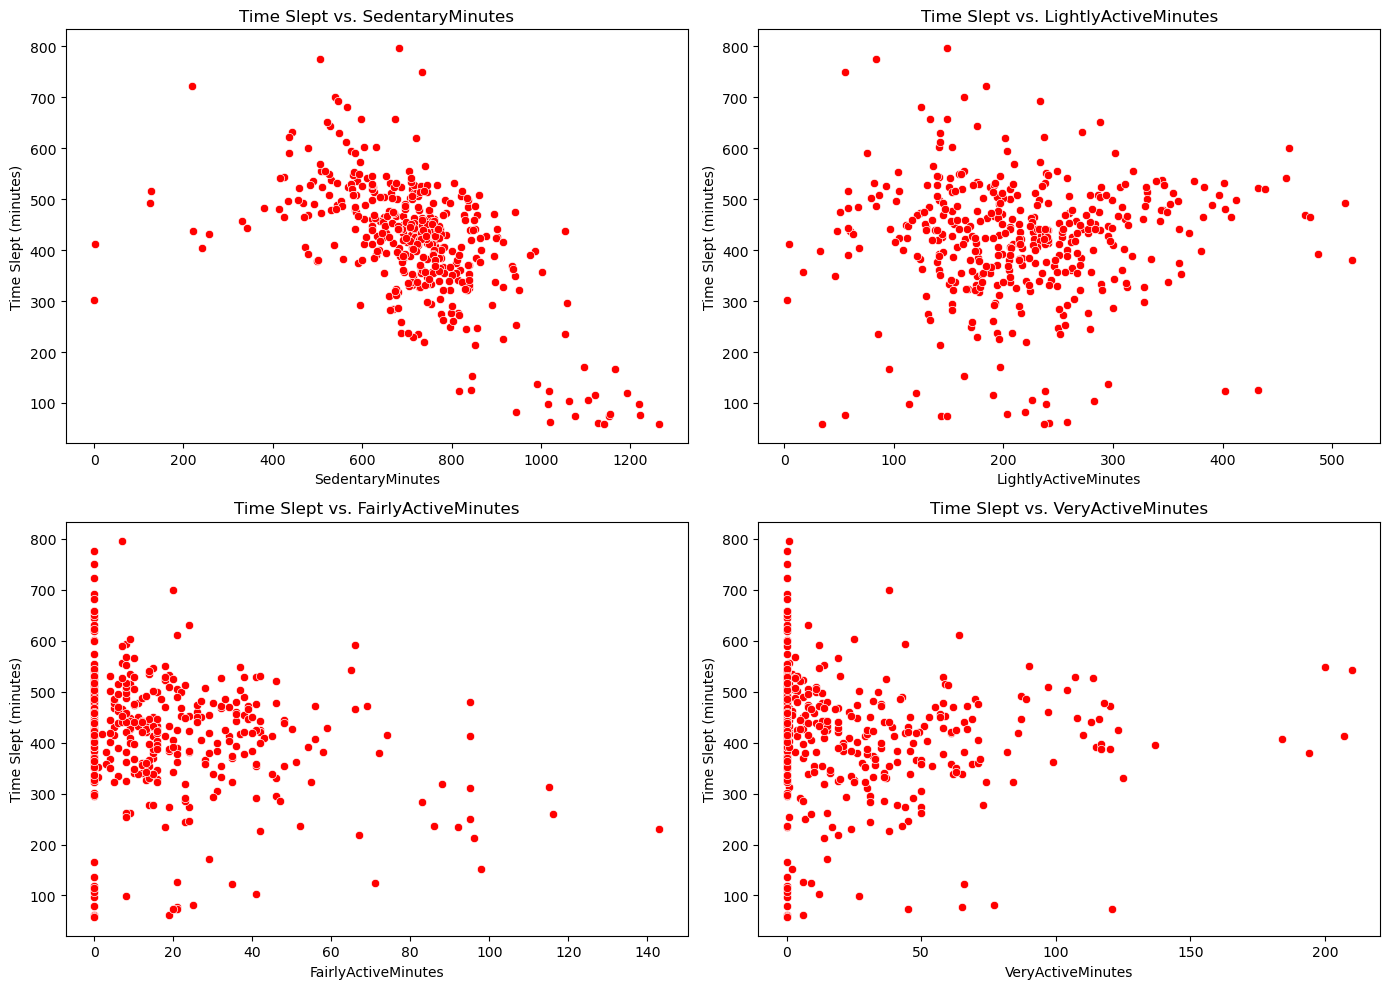

In [247]:
#merge sleep day and daily intensities

def plot_time_to_fall_asleep_vs_activity_minutes(df: pd.DataFrame):
    activity_columns = ["SedentaryMinutes", "LightlyActiveMinutes", "FairlyActiveMinutes", "VeryActiveMinutes"]
    plt.figure(figsize=(14, 10))
    
    for i, activity in enumerate(activity_columns, 1):
        plt.subplot(2, 2, i)
        sns.scatterplot(data=df, x=activity, y="TimeToFallAsleep")
        plt.title(f'Time to Fall Asleep vs. {activity}')
        plt.xlabel(activity)
        plt.ylabel('Time to Fall Asleep (minutes)')
    
    plt.tight_layout()
    plt.show()
    
def plot_time_slept_vs_activity_minutes(df: pd.DataFrame):
    activity_columns = ["SedentaryMinutes", "LightlyActiveMinutes", "FairlyActiveMinutes", "VeryActiveMinutes"]
    plt.figure(figsize=(14, 10))
    
    for i, activity in enumerate(activity_columns, 1):
        plt.subplot(2, 2, i)
        sns.scatterplot(data=df, x=activity, y="TotalMinutesAsleep",color=["red"])
        plt.title(f'Time Slept vs. {activity}')
        plt.xlabel(activity)
        plt.ylabel('Time Slept (minutes)')
    
    plt.tight_layout()
    plt.show()

plot_time_to_fall_asleep_vs_activity_minutes(activityAndSleepday1)
plot_time_slept_vs_activity_minutes(activityAndSleepday1)


Does amount of steps affect time to fall asleep?

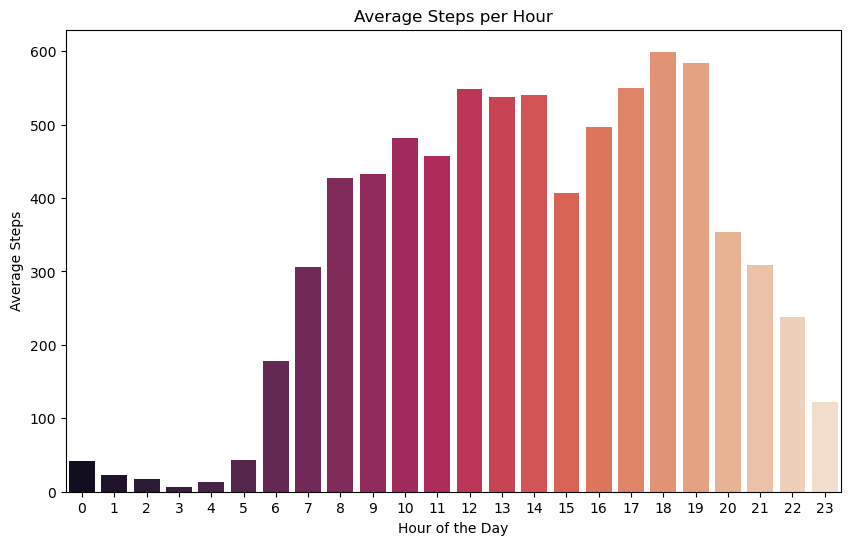

In [81]:
hourlySteps_copy = hourlySteps.copy()#avoid modification of the data
hourlySteps_copy["ActivityHour"] = pd.to_datetime(hourlySteps_copy["ActivityHour"], format='%m/%d/%Y %I:%M:%S %p')

hourlySteps_copy["Date"] = hourlySteps_copy["ActivityHour"].dt.date
hourlySteps_copy["Hour"] = hourlySteps_copy["ActivityHour"].dt.hour

#hourlySteps_copy.head()
#average, proportion of times is not 0 steps
average_steps_per_hour = hourlySteps_copy.groupby("Hour")["StepTotal"].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Hour", y="StepTotal", data=average_steps_per_hour, palette="rocket")

# Customize the plot
plt.title('Average Steps per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Steps')
plt.xticks(range(24))  # Ensure all hours from 0 to 23 are shown
plt.show()

In [82]:
#if Hour = 6-11 morning
# if Hour = 12-17 midday
#if Hour = 18-23 eveninh
#groupedUsers = hourlySteps_copy.groupby(["Id"])
#if (groupedUsers)
morningHours = [6,7,8,9,10,11]
middayHours = [12,13,14,15,16,17]
eveningHours = [18,19,20,21,22,23]

def obtain_Dominant_Category(df: pd.DataFrame):
    groupedUsers = df.groupby(["Id","Date"])
    for (user_id, date), group in groupedUsers:
        stepsInMorning = group[group["Hour"].isin(morningHours)]["StepTotal"].sum()
        stepsInMidday = group[group["Hour"].isin(middayHours)]["StepTotal"].sum()
        stepsInEvening = group[group["Hour"].isin(eveningHours)]["StepTotal"].sum()
        if stepsInMorning > stepsInMidday and stepsInMorning > stepsInEvening:
            df["Dominant Category"] = "Morning"
            if stepsInMorning > (stepsInMidday+stepsInEvening): 
                df["Significant Difference"]=True
            else:
                df["Significant Difference"]=False
        elif stepsInMorning < stepsInMidday and stepsInMidday > stepsInEvening:
            df["Dominant Category"] = "Midday"
            if stepsInMidday > (stepsInMorning+stepsInEvening): 
                df["Significant Difference"]=True
            else:
                df["Significant Difference"]=False
        elif stepsInEvening > stepsInMorning and stepsInEvening > stepsInMidday:
            df["Dominant Category"] = "Evening"
            if stepsInEvening > (stepsInMorning+stepsInMidday): 
                df["Significant Difference"]=True
            else:
                df["Significant Difference"]=False
    return df
new_hourlySteps_copy = obtain_Dominant_Category(hourlySteps_copy)
sleepday1_copy1 = sleepday1.copy()
sleepday1_copy1["SleepDay"] = pd.to_datetime(sleepday1_copy1['SleepDay']).dt.date

#sleepday1.head()
#new_hourlySteps_copy.head()
new_hourlySteps_sleepday = pd.merge(new_hourlySteps_copy, sleepday1_copy1, left_on = ["Id","Date"], right_on = ["Id","SleepDay"])
#if category = eg Morning, then significant=True if midday+evening<morning
#new_hourlySteps_sleepday.head()
#new_hourlySteps_sleepday.head()


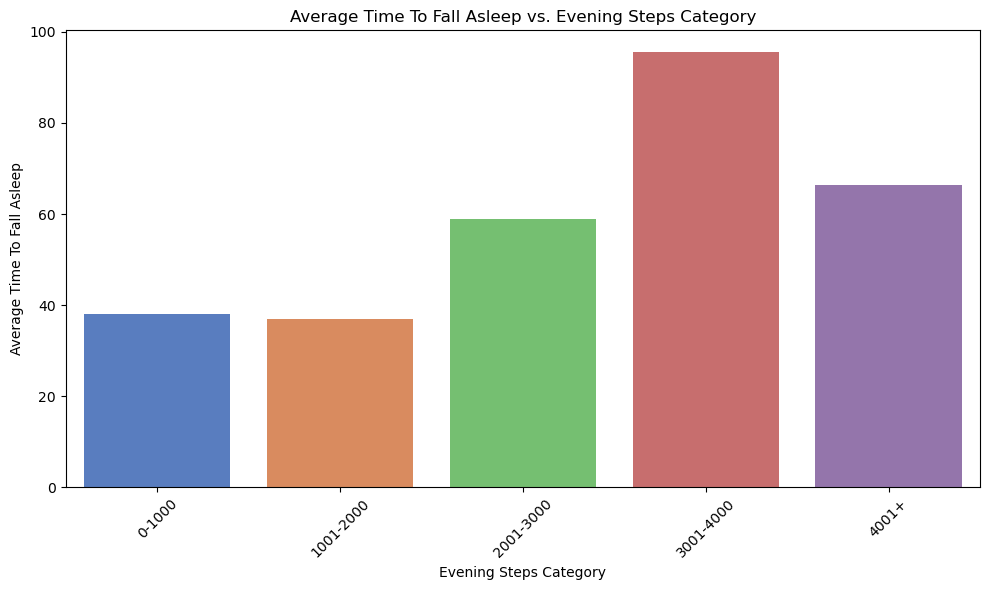

In [83]:
evening_data = new_hourlySteps_sleepday[new_hourlySteps_sleepday["Hour"].isin([18, 19, 20, 21, 22, 23])].copy()

# Step 2: Define bins for evening steps and labels
bins_steps = [0, 1000, 2000, 3000, 4000, float('inf')]
labels_steps = ["0-1000", "1001-2000", "2001-3000", "3001-4000", "4001+"]

# Step 3: Create 'Evening Steps Category' column by binning 'Steps' column
evening_data.loc[:, 'Evening Steps Category'] = pd.cut(evening_data['StepTotal'], bins=bins_steps, labels=labels_steps)

# Step 4: Group by 'Evening Steps Category' and calculate average 'TotalMinutesAsleep'
avg_minutes_asleep_evening = evening_data.groupby('Evening Steps Category')['TimeToFallAsleep'].mean().reset_index()

# Step 5: Plotting Bar Chart - Evening Steps vs. Average Total Minutes Asleep
plt.figure(figsize=(10, 6))
sns.barplot(x='Evening Steps Category', y='TimeToFallAsleep', data=avg_minutes_asleep_evening, palette='muted')
plt.title('Average Time To Fall Asleep vs. Evening Steps Category')
plt.xlabel('Evening Steps Category')
plt.ylabel('Average Time To Fall Asleep')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




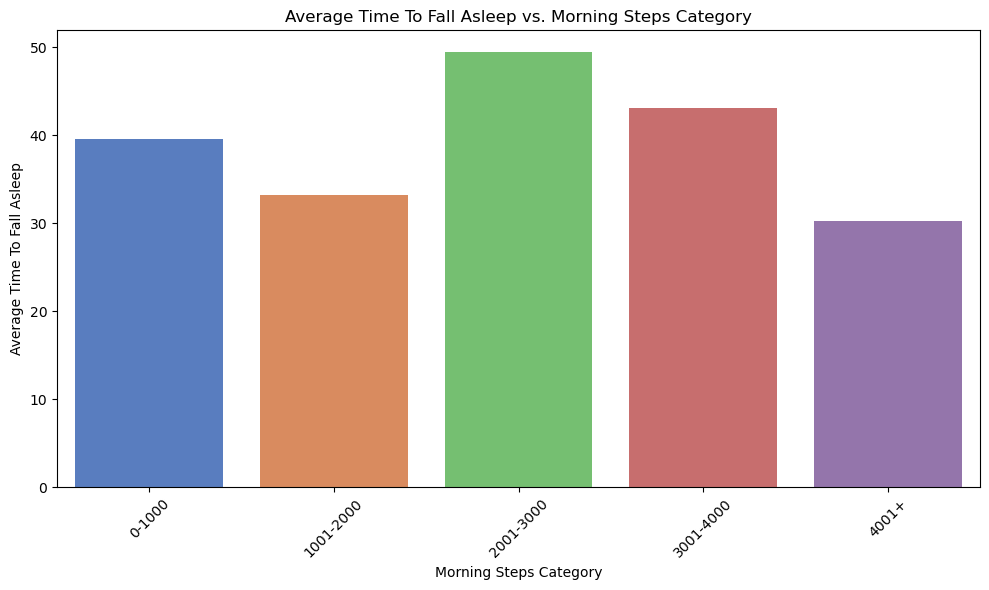

In [84]:
morning_data = new_hourlySteps_sleepday[new_hourlySteps_sleepday["Hour"].isin([12, 13, 14, 15, 16, 17])].copy()

# Step 2: Define bins for evening steps and labels
bins_steps = [0, 1000, 2000, 3000, 4000, float('inf')]
labels_steps = ["0-1000", "1001-2000", "2001-3000", "3001-4000", "4001+"]

# Step 3: Create 'Evening Steps Category' column by binning 'Steps' column
morning_data.loc[:, 'Morning Steps Category'] = pd.cut(morning_data['StepTotal'], bins=bins_steps, labels=labels_steps)

# Step 4: Group by 'Evening Steps Category' and calculate average 'TotalMinutesAsleep'
avg_minutes_asleep_morning = morning_data.groupby('Morning Steps Category')['TimeToFallAsleep'].mean().reset_index()

# Step 5: Plotting Bar Chart - Evening Steps vs. Average Total Minutes Asleep
plt.figure(figsize=(10, 6))
sns.barplot(x='Morning Steps Category', y='TimeToFallAsleep', data=avg_minutes_asleep_morning, palette='muted')
plt.title('Average Time To Fall Asleep vs. Morning Steps Category')
plt.xlabel('Morning Steps Category')
plt.ylabel('Average Time To Fall Asleep')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

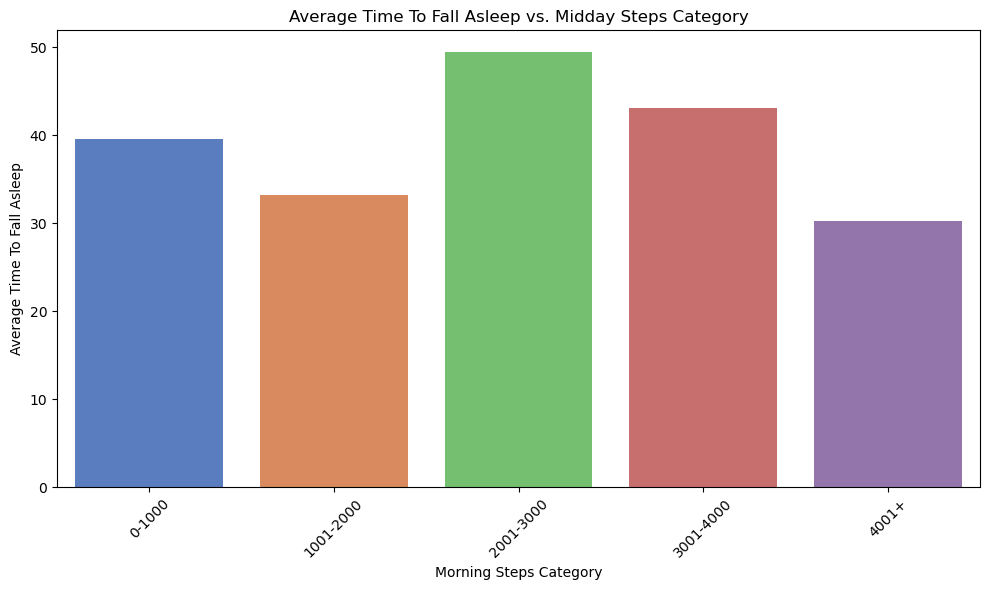

In [85]:
midday_data = new_hourlySteps_sleepday[new_hourlySteps_sleepday["Hour"].isin([12, 13, 14, 15, 16, 17])].copy()

# Step 2: Define bins for evening steps and labels
bins_steps = [0, 1000, 2000, 3000, 4000, float('inf')]
labels_steps = ["0-1000", "1001-2000", "2001-3000", "3001-4000", "4001+"]

# Step 3: Create 'Evening Steps Category' column by binning 'Steps' column
midday_data.loc[:, 'Midday Steps Category'] = pd.cut(midday_data['StepTotal'], bins=bins_steps, labels=labels_steps)

# Step 4: Group by 'Evening Steps Category' and calculate average 'TotalMinutesAsleep'
avg_minutes_asleep_midday = midday_data.groupby('Midday Steps Category')['TimeToFallAsleep'].mean().reset_index()

# Step 5: Plotting Bar Chart - Evening Steps vs. Average Total Minutes Asleep
plt.figure(figsize=(10, 6))
sns.barplot(x='Midday Steps Category', y='TimeToFallAsleep', data=avg_minutes_asleep_midday, palette='muted')
plt.title('Average Time To Fall Asleep vs. Midday Steps Category')
plt.xlabel('Morning Steps Category')
plt.ylabel('Average Time To Fall Asleep')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [88]:
activityAndSleep_copy.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,Day_of_Week_x,N_Day_of_Week_x,Sleep_Level,TimeToFallAsleep,...,LightlyActiveMinutes,SedentaryMinutes,Calories,Day_of_Week_y,N_Day_of_Week_y,IntenseMinutes,Activity_Level,CorrectTotalTime,Steps Category,Sleep Category
0,1503960366,2016-04-12,1,327,346,4/12/2016,Tuesday,1,Deprieved,19,...,328,728,1985,Tuesday,1,38,Very_Active,True,"10,000 to 14,999",Less Than 7 hours
1,1503960366,2016-04-13,2,384,407,4/13/2016,Wednesday,2,Deprieved,23,...,217,776,1797,Wednesday,2,40,Very_Active,True,"10,000 to 14,999",Less Than 7 hours
2,1503960366,2016-04-15,1,412,442,4/15/2016,Friday,4,Deprieved,30,...,209,726,1745,Friday,4,63,Very_Active,True,"5,000 to 9,999",Less Than 7 hours
3,1503960366,2016-04-16,2,340,367,4/16/2016,Saturday,5,Deprieved,27,...,221,773,1863,Saturday,5,46,Very_Active,False,"10,000 to 14,999",Less Than 7 hours
4,1503960366,2016-04-17,1,700,712,4/17/2016,Sunday,6,Deprieved,12,...,164,539,1728,Sunday,6,58,Very_Active,False,"5,000 to 9,999",More than 9 hours


In [249]:
print(new_hourlySteps_sleepday[new_hourlySteps_sleepday["Dominant Category"]=="Morning"])

Empty DataFrame
Columns: [Id, ActivityHour, StepTotal, Date_x, Hour, Dominant Category, Significant Difference, SleepDay, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed, Date_y, Day_of_Week, N_Day_of_Week, Sleep_Level, TimeToFallAsleep]
Index: []


# 3: Is there a correlation between daily activity levels and average heart rate?

#### We understand activity levels to be defined by a mixture of the following:

    -Calories burnt

    -Distance travelled

    -Steps walked
    
    -Minutes active

WHO defines physical activity as any bodily movement produced by skeletal muscles that require energy expenditure. Physical activity refers to all movement including during leisure time, for transport to get to and from places, or as part of a person’s work.

#### How could activity levels be related two heartrate:

    1. People who exercise their bodies every day may have a healthier heart but still have a high heartrate on average because while they are performing any physical activity, their pulse rises significantly, affecting the mean.

    2. People who do little exercise could also have very high heartrate since performing any activity like walking home may require a bigger effort for their heart.

#### Goal of the section

The goal of this section is to perform an analysis on heartrate and on physical activity per day to evaluate if there is relation between activity level and heartrate.
Firstly, the correlation between heartrate and all other variables will be tested individually, and, in case there is no satisfactory results on the correlation coefficient obtained, a model will be implemented to see if heartrate can be determined/predicted by a composition of some of these features.

## 3.1: Data analysis

### 3.1.1: Analysis of daily_activity

In [254]:
daily_activity.head(10)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


#### Summary of the statistics regarding the dataset:

In [255]:
daily_activity.describe()


,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


There are several things to consider regarding these statistics:

    1. Max values differ significantly from the 75% quantiles for all features.
    This is due to quantiles being computed with averages, so, despite most people (75%) might be below some value for a certain feature, the maximum value recorded for such feature does not take into account percentiles, making the difference considerably large.

    2. Features regarding sedentary minutes and total steps have a very high standard deviation.
    
    3. Some features barely have values, especially the feature LoggedActivitiesDistance has zeros in most of its entries, resulting in such abnormal statistics.

#### Number of users in the dataset and entries per user:

In [256]:
print("Daily Activity Dataset:", daily_activity.Id.nunique(), "unique users")
print('---------------------------------------------------------------')
print(daily_activity['Id'].value_counts())

Daily Activity Dataset: 33 unique users
---------------------------------------------------------------
Id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64


#### Duration of data collection, shape of the dataframe and type of the features:

In [257]:
print("Data in this file was collected from", daily_activity['ActivityDate'].min(), "to", daily_activity['ActivityDate'].max())
print('---------------------------------------------------------------')
print("Shape of Daily Activity:", daily_activity.shape)
print('---------------------------------------------------------------')
print(daily_activity.dtypes)

Data in this file was collected from 4/12/2016 to 5/9/2016
---------------------------------------------------------------
Shape of Daily Activity: (940, 15)
---------------------------------------------------------------
Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object


All of the features are of type int64 or float64 except for ActivityDate, which will not be a problem.


#### Check for null values and duplicates:

In [260]:
print("Daily Activity Dataset has", daily_activity.isnull().values.sum(), "missing values")
print('---------------------------------------------------------------')
print("Duplicates in Daily Acitivity: ", daily_activity.duplicated().head())

Daily Activity Dataset has 0 missing values
---------------------------------------------------------------
Duplicates in Daily Acitivity:  0    False
1    False
2    False
3    False
4    False
dtype: bool


The dataset does not contain any null values or duplicates.

### 3.1.2: Analysis of heartrate_seconds:

In [261]:
heartrate_seconds.head(10)

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101
5,2022484408,4/12/2016 7:22:05 AM,95
6,2022484408,4/12/2016 7:22:10 AM,91
7,2022484408,4/12/2016 7:22:15 AM,93
8,2022484408,4/12/2016 7:22:20 AM,94
9,2022484408,4/12/2016 7:22:25 AM,93


#### Summary of the statistics regarding the dataset:

In [262]:
pd.set_option('display.float_format', '{:.2f}'.format)
print(heartrate_seconds.describe())
pd.reset_option('display.float_format')

                 Id      Value
count    2483658.00 2483658.00
mean  5513764629.27      77.33
std   1950223760.95      19.40
min   2022484408.00      36.00
25%   4388161847.00      63.00
50%   5553957443.00      73.00
75%   6962181067.00      88.00
max   8877689391.00     203.00


#### Number of users in the dataset and entries per user:

In [264]:
print("Heartrate seconds has:", heartrate_seconds.Id.nunique(), "unique users")
print('---------------------------------------------------------------')
print(heartrate_seconds['Id'].value_counts())

Heartrate seconds has: 14 unique users
---------------------------------------------------------------
Id
4020332650    285461
6962181067    266326
5553957443    255174
4388161847    249748
5577150313    248560
8877689391    228841
4558609924    192168
6117666160    158899
2022484408    154104
2347167796    152683
7007744171    133592
8792009665    122841
6775888955     32771
2026352035      2490
Name: count, dtype: int64


#### Duration of data collection, shape of the dataframe and type of the features:

In [265]:
print("Data in this file was collected from", heartrate_seconds['Value'].min(), "to", heartrate_seconds['Value'].max())
print('---------------------------------------------------------------')
print("Shape of Heartrate sconds:", heartrate_seconds.shape)
print('---------------------------------------------------------------')
print(heartrate_seconds.dtypes)

Data in this file was collected from 36 to 203
---------------------------------------------------------------
Shape of Heartrate sconds: (2483658, 3)
---------------------------------------------------------------
Id        int64
Time     object
Value     int64
dtype: object


#### Check for null values and duplicates:

In [266]:
print("Daily Activity Dataset has", daily_activity.isnull().values.sum(), "missing values")
print('---------------------------------------------------------------')
print("Duplicates in Daily Acitivity: ", daily_activity.duplicated().head())

Daily Activity Dataset has 0 missing values
---------------------------------------------------------------
Duplicates in Daily Acitivity:  0    False
1    False
2    False
3    False
4    False
dtype: bool


The dataset does not contain any null values or duplicates.

## 3.2: Correlation study

### 3.2.1: Prepare merged dataset

In [267]:
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])
heartrate_seconds['Time'] = pd.to_datetime(heartrate_seconds['Time'])
heartrate_seconds['date'] = heartrate_seconds['Time'].dt.date

daily_avg_heartrate = heartrate_seconds.groupby(['Id', 'date'])['Value'].mean().reset_index()
daily_avg_heartrate.rename(columns={'Value': 'AvgHeartrate'}, inplace=True)
daily_avg_heartrate['date'] = pd.to_datetime(daily_avg_heartrate['date'])

daily_activity_and_heartrate = pd.merge(daily_activity, daily_avg_heartrate, left_on=['Id', 'ActivityDate'], right_on=['Id', 'date'])
daily_activity_and_heartrate.drop(columns=['date'], inplace=True)

daily_activity_and_heartrate.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,AvgHeartrate
0,2022484408,2016-04-12,11875,8.34,8.34,0.0,3.31,0.77,4.26,0.0,42,14,227,1157,2390,75.804177
1,2022484408,2016-04-13,12024,8.50,8.50,0.0,2.99,0.10,5.41,0.0,43,5,292,1100,2601,80.337584
2,2022484408,2016-04-14,10690,7.50,7.50,0.0,2.48,0.21,4.82,0.0,32,3,257,1148,2312,72.628597
3,2022484408,2016-04-15,11034,8.03,8.03,0.0,1.94,0.31,5.78,0.0,27,9,282,1122,2525,80.437382
4,2022484408,2016-04-16,10100,7.09,7.09,0.0,3.15,0.55,3.39,0.0,41,11,151,1237,2177,75.960547


The following checks if a new feature ActiveDistance = VeryActiveDistance + ModeratelyActiveDistance + LightActiveDistance should be included or not. This is done by checking if daily SedentaryActiveDistance has a relevant weight.
Simirlarly, this also checks the impact of LoggedActivitiesDistance

In [269]:
print(daily_activity_and_heartrate['SedentaryActiveDistance'].sum()/len(daily_activity_and_heartrate))
print(daily_activity_and_heartrate['LoggedActivitiesDistance'].sum()/len(daily_activity_and_heartrate))

0.0016766467081483253
0.20083770030986764


The output of the cell above shows that SedentaryActiveDistance is not very relevant, a feature ActiveDistance will not be created and SedentaryActiveDistance will be ignored due to its low impact.

LoggedActivities, despite having many zeros on its entries will be included in the model since it still has an average of 200 daily meters.

### Creation of new features and ratios:

In [270]:
daily_activity_and_heartrate['TotalActiveMinutes'] = daily_activity_and_heartrate['VeryActiveMinutes'] + daily_activity_and_heartrate['FairlyActiveMinutes'] + daily_activity_and_heartrate['LightlyActiveMinutes']
daily_activity_and_heartrate['ActivityRatio'] = daily_activity_and_heartrate['TotalActiveMinutes'] / (daily_activity_and_heartrate['TotalActiveMinutes'] + daily_activity_and_heartrate['SedentaryMinutes'])

daily_activity_and_heartrate.head()


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,AvgHeartrate,TotalActiveMinutes,ActivityRatio
0,2022484408,2016-04-12,11875,8.34,8.34,0.0,3.31,0.77,4.26,0.0,42,14,227,1157,2390,75.804177,283,0.196528
1,2022484408,2016-04-13,12024,8.50,8.50,0.0,2.99,0.10,5.41,0.0,43,5,292,1100,2601,80.337584,340,0.236111
2,2022484408,2016-04-14,10690,7.50,7.50,0.0,2.48,0.21,4.82,0.0,32,3,257,1148,2312,72.628597,292,0.202778
3,2022484408,2016-04-15,11034,8.03,8.03,0.0,1.94,0.31,5.78,0.0,27,9,282,1122,2525,80.437382,318,0.220833
4,2022484408,2016-04-16,10100,7.09,7.09,0.0,3.15,0.55,3.39,0.0,41,11,151,1237,2177,75.960547,203,0.140972


#### Distribution of features:

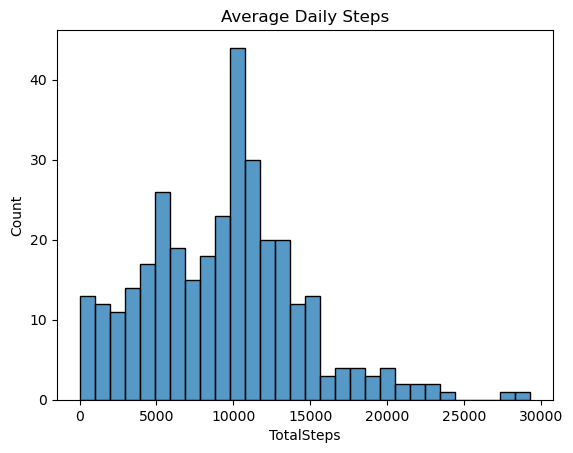

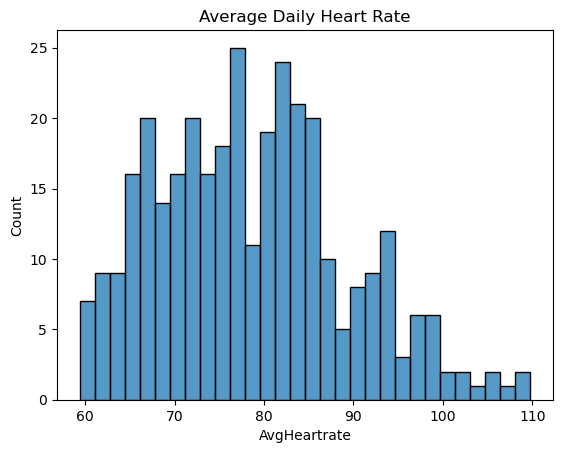

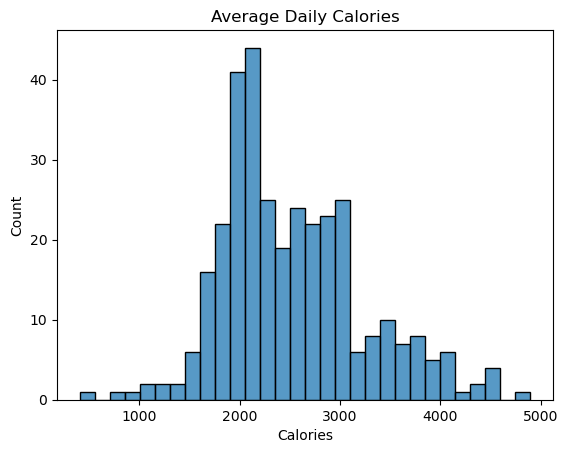

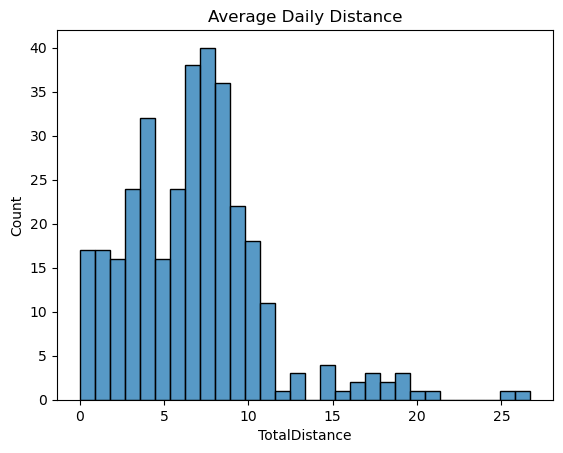

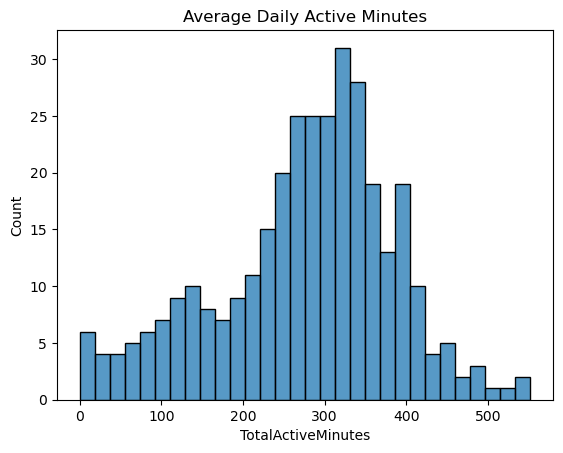

In [271]:
sns.histplot(daily_activity_and_heartrate['TotalSteps'], bins=30)
plt.title('Average Daily Steps')
plt.show()

sns.histplot(daily_activity_and_heartrate['AvgHeartrate'], bins=30)
plt.title('Average Daily Heart Rate')
plt.show()

sns.histplot(daily_activity_and_heartrate['Calories'], bins=30)
plt.title('Average Daily Calories')
plt.show()

sns.histplot(daily_activity_and_heartrate['TotalDistance'], bins=30)
plt.title('Average Daily Distance')
plt.show()

sns.histplot(daily_activity_and_heartrate['TotalActiveMinutes'], bins=30)
plt.title('Average Daily Active Minutes')
plt.show()


#### Scatterplots between daily average heartrate and features:

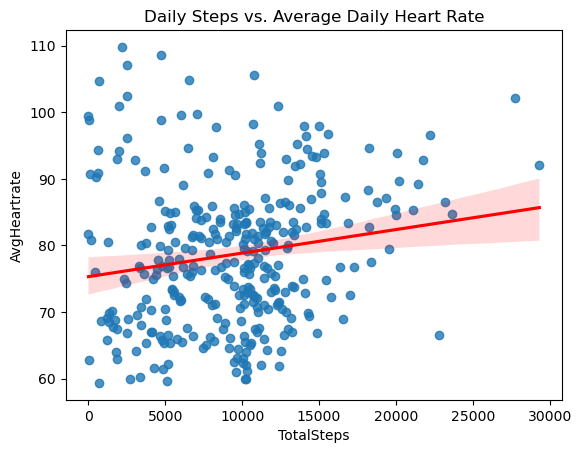

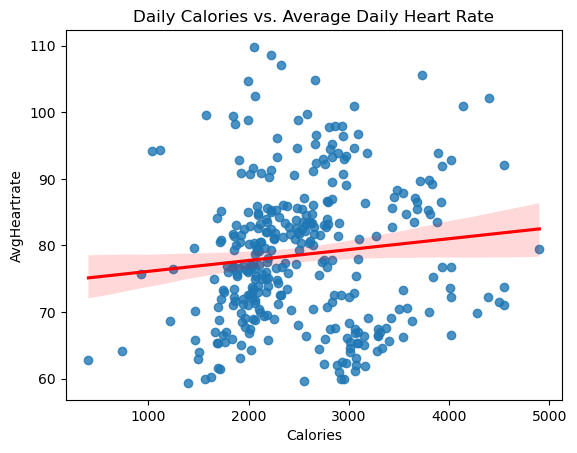

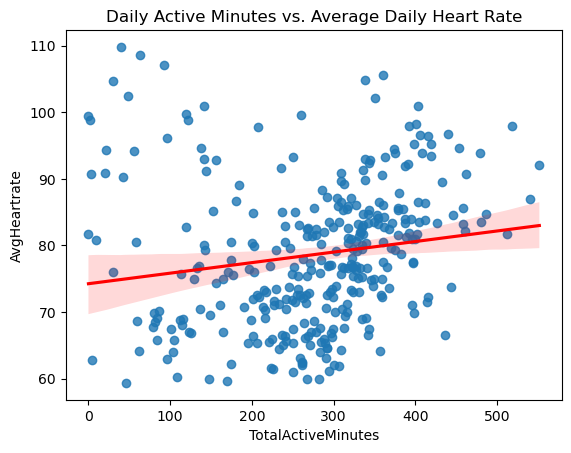

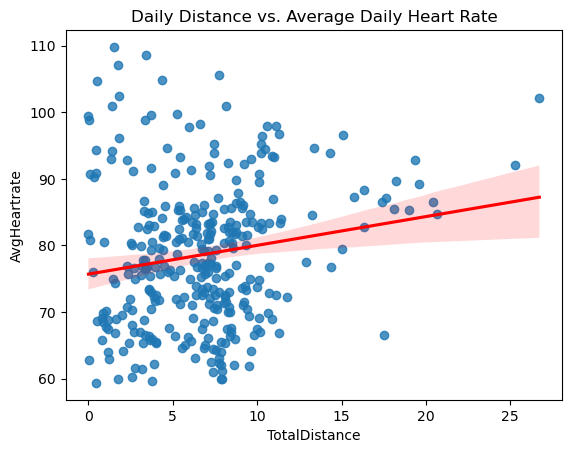

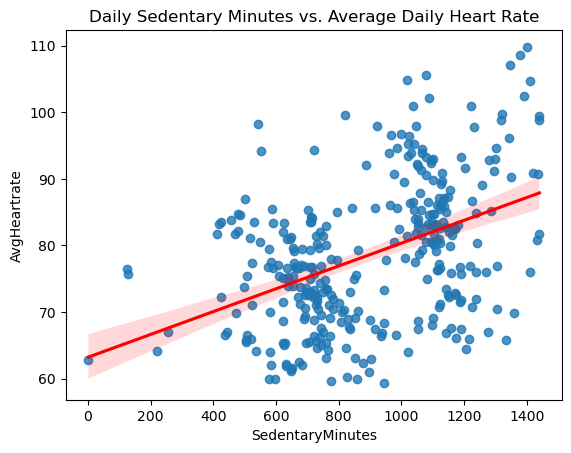

In [272]:
sns.regplot(x='TotalSteps', y='AvgHeartrate', data=daily_activity_and_heartrate, line_kws={'color': 'red'})
plt.title('Daily Steps vs. Average Daily Heart Rate')
plt.show()

sns.regplot(x='Calories', y='AvgHeartrate', data=daily_activity_and_heartrate, line_kws={'color': 'red'})
plt.title('Daily Calories vs. Average Daily Heart Rate')
plt.show()

sns.regplot(x='TotalActiveMinutes', y='AvgHeartrate', data=daily_activity_and_heartrate, line_kws={'color': 'red'})
plt.title('Daily Active Minutes vs. Average Daily Heart Rate')
plt.show()

sns.regplot(x='TotalDistance', y='AvgHeartrate', data=daily_activity_and_heartrate, line_kws={'color': 'red'})
plt.title('Daily Distance vs. Average Daily Heart Rate')
plt.show()

sns.regplot(x='SedentaryMinutes', y='AvgHeartrate', data=daily_activity_and_heartrate, line_kws={'color': 'red'})
plt.title('Daily Sedentary Minutes vs. Average Daily Heart Rate')
plt.show()



#### Correlation

In [273]:
features= ['TotalSteps', 'TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LoggedActivitiesDistance', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'AvgHeartrate', 'TotalActiveMinutes', 'ActivityRatio']

correlation_data = daily_activity_and_heartrate[features]
correlation_data.head()

,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LoggedActivitiesDistance,LightlyActiveMinutes,SedentaryMinutes,Calories,AvgHeartrate,TotalActiveMinutes,ActivityRatio
0,11875,8.34,3.31,0.77,4.26,0.0,42,14,0.0,227,1157,2390,75.804177,283,0.196528
1,12024,8.50,2.99,0.10,5.41,0.0,43,5,0.0,292,1100,2601,80.337584,340,0.236111
2,10690,7.50,2.48,0.21,4.82,0.0,32,3,0.0,257,1148,2312,72.628597,292,0.202778
3,11034,8.03,1.94,0.31,5.78,0.0,27,9,0.0,282,1122,2525,80.437382,318,0.220833
4,10100,7.09,3.15,0.55,3.39,0.0,41,11,0.0,151,1237,2177,75.960547,203,0.140972


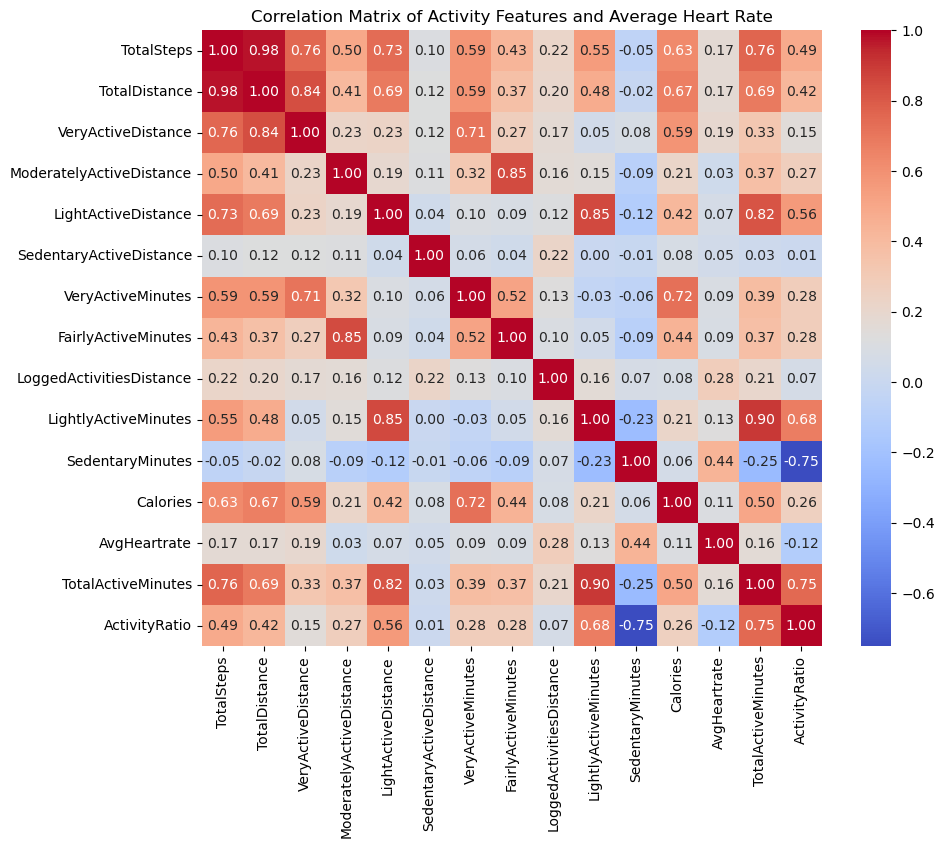

In [274]:
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Activity Features and Average Heart Rate')
plt.show()

As we can observe, the highest correlation coefficient that AvgHeartrate has with respect to another variable is (approximately) 0.44 with the variable SedentaryMinutes. Which indicates that an individual whose activity is mainly sedentary, has a higher propension to a high heartrate due to its untrained body.

According to the correlation matrix, LoggedActiveDistance also seems to have certain correlation with AvgHeartrate (0.28).

Apart from those, there is no other considerable correlation between AvgHeartrate and the rest of the variables.

## 3.3: Regression model:

In [275]:
X = daily_activity_and_heartrate.drop(["AvgHeartrate"], axis=1)
y = daily_activity_and_heartrate["AvgHeartrate"]

In [276]:
from sklearn.ensemble import RandomForestRegressor

def transform_data(X: pd.DataFrame) -> pd.DataFrame:
   
    X_new = X.copy()

    features_of_interest = ['TotalSteps', 'LoggedActivitiesDistance', 'TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'Calories', 'TotalActiveMinutes', 'ActivityRatio']
    X_new = (X_new[features_of_interest]) 
    X_new.fillna(X_new.mode().iloc[0], inplace= True)

    for feature in features_of_interest:
        if feature not in X_new:
            X_new.drop(columns=feature, inplace=True)

    return X_new

def best_prediction_model(X: pd.DataFrame, y: pd.Series):

    model = RandomForestRegressor()
    model.fit(X, y)
    
    return model

The model used is the random forest regressor, which is very robust against overfitting, allowing the inclusion of many features, from which the model will randomly select many subsets to obtain the most efficient one.

The model also checks for NA values, which are replaced by the feature's mode, and drops any feature of interest which does not appear in the dataframe.

### 3.3.2: Model evaluation

In [277]:
import time
from sklearn.model_selection import train_test_split

def rmsle(actual, predicted):
  
    actual = np.array(actual)
    predicted = np.array(predicted)

    log_true = np.log1p(actual)
    log_pred = np.log1p(predicted)

    squared_log_diff = np.square(log_true - log_pred)
    mean_squared_log_diff = np.mean(squared_log_diff)

    return np.sqrt(mean_squared_log_diff)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

t0 = time.perf_counter()
best = best_prediction_model(transform_data(X_train), y_train)
predicted = best.predict(transform_data(X_test))
t1 = time.perf_counter()
print(f"Your model took {t1-t0:.4} seconds to be trained.\n")

result = round(rmsle(y_test, predicted), 6)
print("RMSE on test set:", result)

Your model took 0.1373 seconds to be trained.

RMSE on test set: 0.089147


## 3.4: Conclusion

The RMSE obtained by the test is satisfactory enough to state that the implemented model can accurately predict the average heart rate.

Despite there is no high correlation between the label and the features individually, a set of well-chosen features can manage to accurately predict AvgHeartrate, proving that there is a high correlation between daily activity levels and heartrate.